> # Prosper Loan: Exploratory Data Analysis

## Overview: Credit Risk Modelling 

In the lending industry, investors are willing to accept some degree of risk in their reach for larger return. How much risk are they willing to incur in the event of a borrower's default? **Credit risk modelling** refers to the use of financial models to estimate losses a firm might suffer in the event of a borrower’s default. 


Models from financial intsitutions draw upon

1) The credit history of borrowers, 

2) Third-party data – such as rating agency data – and 

3) Inputs from their own economic stress scenarios...

to measure credit risk.


## Problem Statement
In this project, I investigate a loan dataset from the Prosper peer-to-peer lending platform. There are many questions one could ask of this data, but I will focus on the questions:

1) **How risky is a borrower?**

We note that risky borrowers are those that are likely to default a loan. This suggest that our target variable is **LoanStatus** whicc likley contains informaton about completed and defaulted loans respectively. If we know the independent features that are correlated with LoanStatus, we can use these features to predict in future which loans are likely to default? 

2) **Given the risk, will a borrower be elligible for a loan?**

A measure of the riskness of a borrower is given by the Borrower's interest rate. The riskier the borrower, the higher the interest rate. Thus with interest rate in mind, investors can decide whether a borrower is elligible for the loan.

In step by step processes, I show how to process raw data, clean unnecessary part of it, select relevant features, perform exploratory data analysis.

### Data Structure
We’ll be using publicly available data from [Prosper](https://en.wikipedia.org/wiki/Prosper_Marketplace) to determine if a borrower will pay off a loan. The data which was downloaded from Udacity's course webpage, covers over 100000 loans funded by Prosper peer-to-peer lending platform between November 2005 and March 2014. The dataset has 81 variables.

The description of each variable can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0). Looking at the above 81 features, and recalling the data size of 113,937, it may seem scary first, but our exploration would be narrowed to our research questions, which will eventually reduce the number of variables we may have for analysis. 

#### Target/dependent variable
With our project objective in mind, our key variable for exploration will be **LoanStatus** - Which includes values like: Current, Cancelled, Charge offs, Completed, Delinquent and Default.

For our research purpose, values such as charge offs, delinquent,cancelled and default will all be classified under **Default** loan status.

### Supporting/Independent variables

The following list of variables would support my investigation 


- **EmploymentStatus** -Employment status of borrowers at the time the listing was created

- **EmploymentStatusDuration** -How long (in months) is the borrower's employment status at the time listing was created

- **ProsperScore** -Risk factor score ranging from 1-10. 10 being least risky.

- **BorrowerRate** -The Borrower's interest rate for the loan. The riskier a borrower, the higher the interest rate

- **BorrowerAPR** - The Borrower’s Annual Percentage Rate for the loan. 

- **ProsperRating (numeric)** -The Prosper Rating assigned at the time the listing was created, for listings after July 2009

- **CreditGrade** - Credit Rating assigned at the time the listing was created, for listings prio to July 2009.

- **CurrentDelinquencies** -Number of delinquencies in the past 7 years at the time listing was created.

- **IncomeVerifiable** - If the income of the borrower is verifiable at the time of listing (True & False)

- **StatedMonthlyIncome** -The monthly income the borrower stated at the time the listing was created. 

- **CreditScoreRangeLower** and **CreditScoreRangeUpper** - Respectively the lower and upper value of the range representing Borrower's credit score

- **CreditScoreRange** -To be created from CreditScoreRangeLower and CreditScoreRangeUpper

- **Bank Card Utilization** -The percentage of available revolving credit that is utilized at the time the credit profile was pulled. Higher balance on the credit card indicates borrower’s inability to pay off debts.

- **AvailableBankcardCredit

- **DebtToIncomeRatio** -The debt to income ratio of the borrower at the time the credit profile was pulled. The ratio of debt to income indicates spending habits of the borrower.

- **ListingCategory (numeric)** -The category of listing selected by borrowers at the time listing was created. It shows reason for requesting a loan.

- **LoanOriginalAmount** -Amount of loan approved at origination

- **IsBorrowerHomeowner** -A Borrower is a homeowner if they have mortgage on their credit profile or if they provide proof that they are home owners.

- **Borrower State** -The two letter abbreviation of the state of the address of the borrower at the time the Listing was created. We plan to investigate the percentage of defaulters across the country. To this end, percentage of defaulters for each state need to be calculated.

- **Occupation** - Occupation stated by Borrower at the time listing was created

- **MonthlyLoanPayment** -The scheduled loan payment




### Table of Contents

I will clean and filter the data, explore the data with some visualisations, the conclude with a summary of my results. Hence we have divided the project into 4 sections:

I. [Get to Know the Data](#step1)<br>
II. [Exploratory Data Analysis](#EDA1)<br>
III. [Data Wrangling](#DataWrang)<br>
IV. [Exploratory data Analysis](#EDA2)<br>


To begin, we first import all programming packages; Numpy, Pandas, Matplotlib, and Seaborn.

In [1]:
# import all packages and set plots to be embedded inline
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid", {'axes.grid' : False})
%matplotlib inline

In [2]:
# expand maximun number of columns and row dosplayed

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

## <a class="anchor" id="step1">Get to Know the Data</a>


In [4]:
#load in dataset
df = pd.read_csv('prosperLoanData.csv')

In [7]:
print(df.shape)
df.head(2)

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [9]:
#print information about features with no missing values
df[df.isnull()==False].head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

**Observations**

- Our key variable **LoanStatus** has no missing values.
- Some of the supporting variables have a lot of null values, such as BorrowerState. This would need attention.
- Some type object and type float variables will probably need some conversions.
- New columns would be created.



In [11]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

The target feature has 12 categories. For our analysis, we don't care about the current loans.  We will group all loan status excluding completed as default. This leaves us with binary values for our loan status.

## Data Cleaning, Part 1
Let us start by creating CreditScoreRange variable:

> CreditScoreRange = CreditScoreRangeUpper - CreditScoreRangeLower


In [7]:
df_clean = df.copy()

### 1) CreditScoreRange:

Here we want to create a CreditScoreRange variable by selecting a range of values from CreditScoreRangeLower and CreditScoreRangeUpper variables respectively.


**Any missing values?**

In [8]:
print('There are {} missing enteries in CreditScoreRangeUpper and CreditScoreRangeLower variables respectively.'.format(df_clean['CreditScoreRangeLower'].isnull().sum()))

There are 591 missing enteries in CreditScoreRangeUpper and CreditScoreRangeLower variables respectively.


Drop NaN entries in CreditScoreRangeLower and CreditScoreRangeUpper

In [9]:
#code
df_clean.dropna(subset=['CreditScoreRangeUpper', 'CreditScoreRangeLower'],inplace=True)

#test
print('(',df_clean['CreditScoreRangeLower'].isnull().sum(), df_clean['CreditScoreRangeUpper'].isnull().sum(),')')

#what is the structure of the new dataset
df_clean.shape

( 0 0 )


(113346, 81)

Now Create the **CreditScoreRange** variable

In [10]:
#code
df_clean['CreditScoreRange'] = np.where((df_clean['CreditScoreRangeLower'] >=0) & (df_clean['CreditScoreRangeUpper'] <=299),'Very Poor (0-299)',
            np.where((df_clean['CreditScoreRangeLower']> 299) & (df_clean['CreditScoreRangeUpper']<= 599), 'Poor (300-599)', 
             np.where((df_clean['CreditScoreRangeLower']>599) & (df_clean['CreditScoreRangeUpper'] <=679 ),'Fair (600-679)',
             np.where((df_clean['CreditScoreRangeLower'] >679) & (df_clean['CreditScoreRangeUpper'] <= 739),'Good (680-739)', 
            np.where((df_clean['CreditScoreRangeLower'] > 739) & (df_clean['CreditScoreRangeUpper'] <= 799),'Very Good (740-799)',
            np.where((df_clean['CreditScoreRangeLower'] > 799) & (df_clean['CreditScoreRangeUpper'] > 800),'Exceptional (800+)','others'))))))
            
#test

df_clean['CreditScoreRange'].value_counts()

Good (680-739)         44886
Fair (600-679)         36339
Very Good (740-799)    20497
Poor (300-599)          6632
Exceptional (800+)      4859
Very Poor (0-299)        133
Name: CreditScoreRange, dtype: int64

### Select key and supporting variables

In [11]:
#select features of interest
df_var = df_clean[['Term','LoanStatus','LoanOriginalAmount', 'MonthlyLoanPayment','IsBorrowerHomeowner','ListingCategory (numeric)',
                     'StatedMonthlyIncome','ProsperScore','ProsperRating (Alpha)', 'CreditGrade','ListingCreationDate',
                     'BankcardUtilization','Occupation','BorrowerRate','BorrowerState','BorrowerAPR',
                   'DebtToIncomeRatio','IncomeVerifiable','CreditScoreRange','EmploymentStatus',
                   'EmploymentStatusDuration','CurrentDelinquencies','DelinquenciesLast7Years','AvailableBankcardCredit']]
df_var.shape

(113346, 24)

In [12]:
df_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113346 entries, 0 to 113936
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113346 non-null  int64  
 1   LoanStatus                 113346 non-null  object 
 2   LoanOriginalAmount         113346 non-null  int64  
 3   MonthlyLoanPayment         113346 non-null  float64
 4   IsBorrowerHomeowner        113346 non-null  bool   
 5   ListingCategory (numeric)  113346 non-null  int64  
 6   StatedMonthlyIncome        113346 non-null  float64
 7   ProsperScore               84853 non-null   float64
 8   ProsperRating (Alpha)      84853 non-null   object 
 9   CreditGrade                28362 non-null   object 
 10  ListingCreationDate        113346 non-null  object 
 11  BankcardUtilization        106333 non-null  float64
 12  Occupation                 110347 non-null  object 
 13  BorrowerRate               11

#### Dealing with missing values.

#### Missing data?

1) ProsperScore and ProsperRating (Alpha) is not applicable to all listings prior to July 2009. Thus the 28493 missing eneteries in the variables account for this sum. 

2) Similarly, CreditGrade is not applicable to all listings since July 2009. Thus the  missing eneteries 84984 in the column, account for this sum. 

In [13]:
#let us fill all missing enteries in the categorical variables with 'unknown'

#code
cat_var = df_var.select_dtypes(include=["object"]).columns.values
df_var[cat_var] = df_var[cat_var].fillna("Unknown")

#test
df_var.select_dtypes(exclude=[np.number]).isnull().sum()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


LoanStatus               0
IsBorrowerHomeowner      0
ProsperRating (Alpha)    0
CreditGrade              0
ListingCreationDate      0
Occupation               0
BorrowerState            0
IncomeVerifiable         0
CreditScoreRange         0
EmploymentStatus         0
dtype: int64

In [14]:
#The ProsperScore NaNs can both be replaced with median values.
df_var["ProsperScore"].fillna(df_var["ProsperScore"].median(), inplace=True)

#test
df_var["ProsperScore"].isnull().sum()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0

In [15]:
#let's see how the data information looks so far.
df_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113346 entries, 0 to 113936
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113346 non-null  int64  
 1   LoanStatus                 113346 non-null  object 
 2   LoanOriginalAmount         113346 non-null  int64  
 3   MonthlyLoanPayment         113346 non-null  float64
 4   IsBorrowerHomeowner        113346 non-null  bool   
 5   ListingCategory (numeric)  113346 non-null  int64  
 6   StatedMonthlyIncome        113346 non-null  float64
 7   ProsperScore               113346 non-null  float64
 8   ProsperRating (Alpha)      113346 non-null  object 
 9   CreditGrade                113346 non-null  object 
 10  ListingCreationDate        113346 non-null  object 
 11  BankcardUtilization        106333 non-null  float64
 12  Occupation                 113346 non-null  object 
 13  BorrowerRate               11

Next variable is **DebtToIncomeRatio** which has about 8548 null values. Since 

DebtToIncomeRatio = Debt/Income

and only listings with verified income are granted a loan, this we it is likely that loans with no DebtToIncomeRatio either have missing income, monthlyloanpayment, or incomeverifiable. 

Which is the reason? First, let us take a look at few rows of such columns

In [16]:
dti = df_var[df_var["DebtToIncomeRatio"].isnull()]
dti.head()

,Term,LoanStatus,LoanOriginalAmount,MonthlyLoanPayment,IsBorrowerHomeowner,ListingCategory (numeric),StatedMonthlyIncome,ProsperScore,ProsperRating (Alpha),CreditGrade,ListingCreationDate,BankcardUtilization,Occupation,BorrowerRate,BorrowerState,BorrowerAPR,DebtToIncomeRatio,IncomeVerifiable,CreditScoreRange,EmploymentStatus,EmploymentStatusDuration,CurrentDelinquencies,DelinquenciesLast7Years,AvailableBankcardCredit
40,60,Current,15000,374.81,False,1,12750.0,4.0,C,Unknown,2014-01-27 12:02:57.523000000,0.46,Other,0.1725,WA,0.19630,NaN,False,Good (680-739),Self-employed,276.0,0.0,0.0,69166.0
69,60,Current,9000,197.44,True,1,2700.0,11.0,A,Unknown,2014-01-25 12:07:54.537000000,0.79,Investor,0.1139,IL,0.13636,NaN,False,Good (680-739),Self-employed,12.0,0.0,0.0,5039.0
78,36,Chargedoff,4800,171.13,True,3,0.0,6.0,Unknown,A,2008-06-29 23:23:40.157000000,0.73,Realtor,0.1700,CA,0.18454,NaN,False,Good (680-739),Full-time,68.0,0.0,0.0,9355.0
100,36,Chargedoff,4000,172.76,False,13,0.0,3.0,HR,Unknown,2013-01-25 11:48:26.040000000,0.22,Other,0.3134,CA,0.35356,NaN,False,Good (680-739),Not employed,12.0,0.0,0.0,19359.0
103,36,Chargedoff,15000,579.63,True,3,5000.0,2.0,D,Unknown,2012-04-17 11:58:52.270000000,0.98,Truck Driver,0.2287,CO,0.26681,NaN,False,Good (680-739),Self-employed,29.0,0.0,0.0,502.0


We observe that some of these first 5 loans have stated monthly income and monthly loan status but no documentation to verify their income. While It is possible that these listings have overstated their income or understated their income. For example listing number 78 is a realtor by occupation, has been a realtor for 68 months, is a home owner and has a total of 1 opened trade in the last 6 months, he needs the Prosper loan for business but has stated monthly income of $0. Such borrower could be a dubious borrower.  

In [17]:
df_var.dtypes

Term                           int64
LoanStatus                    object
LoanOriginalAmount             int64
MonthlyLoanPayment           float64
IsBorrowerHomeowner             bool
ListingCategory (numeric)      int64
StatedMonthlyIncome          float64
ProsperScore                 float64
ProsperRating (Alpha)         object
CreditGrade                   object
ListingCreationDate           object
BankcardUtilization          float64
Occupation                    object
BorrowerRate                 float64
BorrowerState                 object
BorrowerAPR                  float64
DebtToIncomeRatio            float64
IncomeVerifiable                bool
CreditScoreRange              object
EmploymentStatus              object
EmploymentStatusDuration     float64
CurrentDelinquencies         float64
DelinquenciesLast7Years      float64
AvailableBankcardCredit      float64
dtype: object

Obviously ordinal categorical variable with type float will be converted to integer. We will convert ProsperScore datatype for now since it has 0 null values and do the others as we progress.

In [18]:
df_var['ProsperScore'] = df_var['ProsperScore'].astype(int)

#test

df_var['ProsperScore'].dtype


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


dtype('int64')

### Data Cleaning part 2

In this section, we want to do some modifications to our variables. 

**EmploymentStatusDuration**

Here we will convert the duration in months to years by dividing by 12.

In [722]:
df_var['EmploymentStatusDuration'] = ((df_var['EmploymentStatusDuration'])/12)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**LoanStatus**

In [723]:
df_var['LoanStatus'].value_counts()

Current                   56576
Completed                 37658
Chargedoff                11944
Defaulted                  4892
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     4
Name: LoanStatus, dtype: int64

The curent loan status is not useful for our analysis. Thus we will exclude these listings from our data.

In [724]:
#code
df_var = df_var.query('LoanStatus != "Current"')

#test
df_var['LoanStatus'].value_counts()

Completed                 37658
Chargedoff                11944
Defaulted                  4892
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     4
Name: LoanStatus, dtype: int64

Next, we will group all loan status excluding completed as default. To achieve this, we convert LoanStatus to integer, encoding completed status as 1 and all others as zeros. 

In [725]:
df_var["LoanStatus"] = (df_var["LoanStatus"] == "Completed").astype(int)

df_var["LoanStatus"].value_counts()/df_var.shape[0]

1    0.663343
0    0.336657
Name: LoanStatus, dtype: float64

#### Income Verifiable

In [726]:
df_var['IncomeVerifiable'].value_counts()

True     52256
False     4514
Name: IncomeVerifiable, dtype: int64

About 92.05% of listings had verified income. We will filter dataset to include only listings with verified income.

In [727]:
df_var = df_var.query('IncomeVerifiable == True')

df_var['IncomeVerifiable'].value_counts()

True    52256
Name: IncomeVerifiable, dtype: int64

**ListingCategory**

Here we rename the variable index to incude the reason for listing a loan as described [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

In [728]:
#code renaming index
index={0: "Not Available", 1: "Debt Consolidation", 2: "Home Improvement", 3: "Business", 
        4: "Personal Loan", 5: "Student Use", 6: "Auto", 7: "Other", 8: "Baby&Adoption", 
       9: "Boat", 10: "Cosmetic Procedure", 11: "Engagement Ring", 12: "Green Loans", 
       13: "Household Expenses", 14: "Large Purchases",15: "Medical/Dental", 16: "Motorcycle", 
       17: "RV", 18: "Taxes", 19: "Vacation", 20: "Wedding Loans"}


df_var['ListingCategory (numeric)'] = df_var['ListingCategory (numeric)'].replace(index)

#test
df_var['ListingCategory (numeric)'].value_counts().head()

Debt Consolidation    17797
Not Available         15919
Other                  5597
Business               3293
Home Improvement       3223
Name: ListingCategory (numeric), dtype: int64

Next replace ListingCategory (numeric) with ListingCategory

In [729]:
df_var.rename(index=str, columns={"ListingCategory (numeric)": "ListingCategory"}, inplace=True)

#### ProsperRating (Alpha)

In [730]:
df_var.rename(index=str, columns={"ProsperRating (Alpha)": "ProsperRatingAlpha"}, inplace=True)

## Any duplicates?

False

## Data Cleaning part 3

We want to check for outliers in this section and treat them accordingly. 
> $1QR = Q_3 - Q_1$

> Lower range = $Q_1 - (1.5 * IQR)$

> Upper range = $Q_3 + (1.5 * IQR)$

So any value below the lower range or above the upper range would be considered as an outlier.

In this cleaning process, we will not update df_var, rather we will define a new dataset df_var_clean. Let us look at the statistical summary of our quantitative variables.

In [732]:
df_var.describe()

,Term,LoanStatus,LoanOriginalAmount,MonthlyLoanPayment,StatedMonthlyIncome,ProsperScore,BankcardUtilization,BorrowerRate,BorrowerAPR,DebtToIncomeRatio,EmploymentStatusDuration,CurrentDelinquencies,DelinquenciesLast7Years,AvailableBankcardCredit
count,52256.000000,52256.000000,52256.000000,52256.000000,52256.000000,52256.000000,45345.000000,52256.00000,52256.000000,52097.000000,45340.000000,52160.000000,51874.000000,45404.000000
mean,37.210196,0.667598,6393.381124,226.453668,5174.570285,6.154489,0.537729,0.19918,0.220859,0.257122,6.920811,0.935698,4.743590,10527.391684
std,7.591376,0.471079,5288.104636,185.999336,4995.128737,1.600640,0.350059,0.08026,0.086954,0.449719,7.107996,2.638580,10.866496,21424.167154
min,12.000000,0.000000,1000.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.006530,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,2850.000000,101.060000,2916.666667,6.000000,0.230000,0.13500,0.149740,0.130000,1.833333,0.000000,0.000000,500.000000
50%,36.000000,1.000000,4700.000000,173.690000,4316.666667,6.000000,0.570000,0.19250,0.213290,0.200000,4.583333,0.000000,0.000000,3115.000000
75%,36.000000,1.000000,8032.000000,304.410000,6250.000000,6.000000,0.850000,0.26450,0.295040,0.300000,9.583333,1.000000,4.000000,11612.500000
max,60.000000,1.000000,35000.000000,2251.510000,483333.333333,11.000000,5.950000,0.36000,0.423950,10.010000,62.916667,83.000000,99.000000,572427.000000


**Bankcard Utilization**

Here we remove outliers in the BankcardUtilization variable. We note that values greater than 1.795 is an outlier.

In [733]:
df_var['BankcardUtilization'].describe()

count    45345.000000
mean         0.537729
std          0.350059
min          0.000000
25%          0.230000
50%          0.570000
75%          0.850000
max          5.950000
Name: BankcardUtilization, dtype: float64

In [734]:
#code
df_var_clean = df_var.query('BankcardUtilization <= 2')
#test
df_var_clean['BankcardUtilization'].describe()

count    45328.000000
mean         0.536825
std          0.346156
min          0.000000
25%          0.220000
50%          0.570000
75%          0.850000
max          2.000000
Name: BankcardUtilization, dtype: float64

#### Available Bank Card Credit

We can see from the statistical description table that maximum avialble bankcard credit is over 500,000 dollars. I believe this is too high compared to the range of principal amount one can get from Prosper. I can just use my bank card credit ifI have this much instead of going for a loan.

To this end, we will remove outliers

Most borrowers have $0 available credit on their card which is an added debt. Looking at the statistical description in table above, any value greater than 29,086 is an outlier.

In [735]:
#code
df_var_clean = df_var_clean.query('AvailableBankcardCredit <= 50000')
#test
df_var_clean['AvailableBankcardCredit'].describe()

count    43505.000000
mean      7307.324055
std      10188.335880
min          0.000000
25%        450.000000
50%       2795.000000
75%       9877.000000
max      50000.000000
Name: AvailableBankcardCredit, dtype: float64

**Stated Monthly Income**

In [736]:
df_var_clean['StatedMonthlyIncome'].describe()

count     43505.000000
mean       5121.346085
std        4776.449643
min           0.000000
25%        2925.000000
50%        4333.333333
75%        6250.000000
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

Here the mean stated monthly income is $\$$5121, 25% of borrowers earn $\$$2925 and 75% earn $\$$6250, this shows that a maximum value of $\$$483,333 for a monthly income is really out of range. We consider as an outlier, stated monthly income of $\$$11,475. However to conserve data, we will set $\$$30,000 as the maximum.


In [737]:
#code
df_var_clean = df_var_clean.query('StatedMonthlyIncome <= 30000')

#test
df_var_clean['StatedMonthlyIncome'].describe()

count    43422.000000
mean      5024.537389
std       3157.635223
min          0.000000
25%       2916.666667
50%       4333.333333
75%       6250.000000
max      30000.000000
Name: StatedMonthlyIncome, dtype: float64

**Debt to Income Ratio**

Values approximately greater than 0.6 is an outlier. 

In [738]:
df_var_clean['DebtToIncomeRatio'].describe()

count    43348.000000
mean         0.261733
std          0.432860
min          0.000000
25%          0.140000
50%          0.210000
75%          0.310000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

In [739]:
#code
df_var_clean = df_var_clean.query('DebtToIncomeRatio <= 1')
#test
df_var_clean['DebtToIncomeRatio'].describe()

count    42989.000000
mean         0.235058
std          0.143703
min          0.000000
25%          0.130000
50%          0.210000
75%          0.310000
max          1.000000
Name: DebtToIncomeRatio, dtype: float64

**EmploymentStatusDuration**

The maximum employment status is 62 years. This is way higher than an average person could work before retirement. It is expected that 35-40 years of work is close to retirement. Thus we will remove outliers here.

In [740]:
df_var_clean = df_var_clean.query('EmploymentStatusDuration <= 40')
df_var_clean['EmploymentStatusDuration'].describe()

count    42906.000000
mean         6.824488
std          6.928764
min          0.000000
25%          1.833333
50%          4.500000
75%          9.500000
max         40.000000
Name: EmploymentStatusDuration, dtype: float64

#### DelinquenciesLast7Years

In [741]:
df_var_clean = df_var_clean.query('DelinquenciesLast7Years <= 20')

df_var_clean['DelinquenciesLast7Years'].describe()

count    40006.00000
mean         2.16500
std          4.36104
min          0.00000
25%          0.00000
50%          0.00000
75%          2.00000
max         20.00000
Name: DelinquenciesLast7Years, dtype: float64

In [742]:
#convert float to integer

#code
df_var_clean['DelinquenciesLast7Years'] = df_var_clean['DelinquenciesLast7Years'].astype(int)
#test
df_var_clean['DelinquenciesLast7Years'].dtype

dtype('int64')

#### CurrentDelinquencies

In [743]:
df_var_clean['CurrentDelinquencies'].describe()

count    40006.000000
mean         0.507974
std          1.544968
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         41.000000
Name: CurrentDelinquencies, dtype: float64

In [744]:
df_var_clean['CurrentDelinquencies'].value_counts().head()

0.0    31498
1.0     4547
2.0     1652
3.0      774
4.0      502
Name: CurrentDelinquencies, dtype: int64

We see that 75.73% of borrowers have zero current delinquencies. This will have a huge effect on the data if we will have to drop all zero enteries in CurrentDelinquencies. To this end, we will create a new dataset for this cleaning process.

In [745]:
df_var_clean_del = df_var_clean.query('CurrentDelinquencies !=0') #remove zero enteries
df_var_clean_del['CurrentDelinquencies'].describe()

count    8508.000000
mean        2.388575
std         2.594661
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        41.000000
Name: CurrentDelinquencies, dtype: float64

Next we will remove outliers. 

In [746]:
df_var_clean_del = df_var_clean_del.query('CurrentDelinquencies <= 6')
df_var_clean_del['CurrentDelinquencies'].describe()

count    7968.000000
mean        1.865713
std         1.285342
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: CurrentDelinquencies, dtype: float64

In [747]:
df_var_clean_del['CurrentDelinquencies'].dtype

dtype('float64')

In [748]:
#convert float to integer

#code
df_var_clean_del['CurrentDelinquencies'] = df_var_clean_del['CurrentDelinquencies'].astype(int)
#test
df_var_clean_del['CurrentDelinquencies'].dtype

dtype('int64')

### Structure of our cleaned dataset

In [749]:
print(df_var_clean.shape)
print(df_var_clean_del.shape)

(40006, 24)
(7968, 24)


### Partitioning our cleaned dataset

In the variable description found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0), we observe that there are two underwritten laws in Prosper since Listing creation, 

- On or before July 2009
- After July 2009.

These laws after variables such as CreditScoreRange, ProsperScore, ProsperRating and CreditGrade. We will not partition our dataset and use them acordingly when needed. 

- First we will extract month and year from the ListingCreationDate variable.
- Write a query to partition the dataset.


Partitioning the **df_var_clean** dataset.

In [750]:
#change string to datetime
df_var_clean['ListingCreationDate'] = pd.to_datetime(df_var_clean['ListingCreationDate']).dt.date.astype('datetime64[ns]')

In [751]:
year = df_var_clean['ListingCreationDate'].map(lambda x : x.year == 2009)
month = df_var_clean['ListingCreationDate'].map(lambda x : x.month < 7)

df_var_clean[year & month]['ListingCreationDate'].max()


Timestamp('2009-05-06 00:00:00')

In [752]:

#code
df_before2009 = df_var_clean.query('ListingCreationDate <= "2009-06-30"')
df_since2009 = df_var_clean.query('ListingCreationDate > "2009-06-30"')

#test
print(df_before2009.shape)
print(df_since2009.shape)
print(df_var_clean.shape)
df_var_clean.shape[0] == (df_before2009.shape[0] + df_since2009.shape[0])

(17484, 24)
(22522, 24)
(40006, 24)


True

Partitioning the **df_var_clean_del** dataset

In [753]:

#code
df_del_before2009 = df_var_clean_del.query('ListingCreationDate <= "2009-06-30"')
df_del_since2009 = df_var_clean_del.query('ListingCreationDate > "2009-06-30"')

#test
print(df_del_before2009.shape)
print(df_del_since2009.shape)
print(df_var_clean_del.shape)
df_var_clean_del.shape[0] == (df_del_before2009.shape[0] + df_del_since2009.shape[0])

(4347, 24)
(3621, 24)
(7968, 24)


True

## Univariate Exploration


### How does borrowing work?
* Potential borrowers create a listing of why they need a loan and why they are likely to make good on it, 
* Potential lenders go through paper works and decide whether to provide them the money at a certain annual percentage rate (APR). 

In this section, we will investigate distributions of individual variables. The outline is as follows:
* First we look at loan properties ike loanstatus,origination amount, terms etc
* We check the characteristics of borrowers, their information and expenses/debt
* Finally we will investigate how Prosper use these information to make decisions.



Let us begin with our principal variable by answering the question

## Loan Information
### What is the ratio of good loans to bad loans?

In [754]:
# print the different values in the loanstatus column
loanstatus_counts_new = df_since2009['LoanStatus'].value_counts()
loanstatus_counts_old = df_before2009['LoanStatus'].value_counts()

print(df_since2009['LoanStatus'].value_counts()/df_since2009.shape[0])

print('\n{}'.format(df_before2009['LoanStatus'].value_counts()/df_before2009.shape[0]))



1    0.705355
0    0.294645
Name: LoanStatus, dtype: float64

1    0.648707
0    0.351293
Name: LoanStatus, dtype: float64


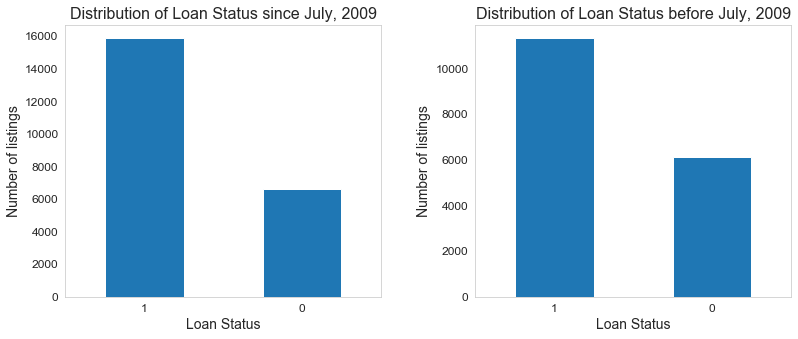

In [755]:
plt.figure(figsize = [13, 5]) 

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)



plt.subplot(1, 2, 1)

loanstatus_counts_new.plot(kind='bar', width = 0.5)
plt.title('Distribution of Loan Status since July, 2009',fontsize = 16)
plt.xticks(rotation = 0,fontsize = 12);
plt.yticks(fontsize = 12);
plt.ylabel('Number of listings',fontsize = 14)
plt.xlabel('Loan Status',fontsize = 14);

plt.subplot(1, 2, 2)

loanstatus_counts_old.plot(kind='bar', width = 0.5)
plt.title('Distribution of Loan Status before July, 2009',fontsize = 16)
plt.xticks(rotation = 0,fontsize = 12);
plt.yticks(fontsize = 12);
plt.ylabel('Number of listings',fontsize = 14)
plt.xlabel('Loan Status',fontsize = 14);

- So for the 'before July 2009' dataset, 63.95% of loans are good while 36.05% of loans are bad. 

- For the 'since July 2009' dataset, 68.95% of loans are good while 32.05% of loans are bad. 

In summary, with the new underlying Prosper law, there is an improvement in loan performance. Later in the Bivariate exploratory analysis, we will investigate relationships between LoanStatus and other variables.

### What do borrowers need the loan for?
Borrowers create a listing and select a listing category which shows the reason for the loan application, how much loan they want and the length of the loan. In this section, we will investigate the reasons borrowers have for applying for loans.

#### Listing Category
What are the reasons why borrowers seek for loan?

In [756]:
list_cat = df_var_clean['ListingCategory'].value_counts()
list_cat = list_cat.sort_values()


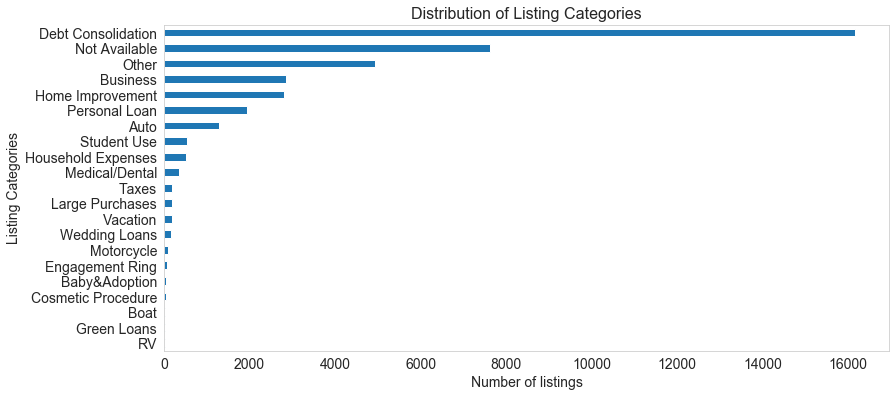

In [757]:
plt.figure(figsize = [13, 6]) 

list_cat.plot(kind='barh', width = 0.5)
plt.title('Distribution of Listing Categories',fontsize = 16)
plt.xticks(rotation = 0,fontsize = 14);
plt.yticks(fontsize = 14);
plt.xlabel('Number of listings',fontsize = 14)
plt.ylabel('Listing Categories',fontsize = 14);

It is quite interesting to see that most borrowers want the Prosper loan for debt consolidation. 

### How much loan do borrowers request for? 

Now that we have seen reasons why borrowers request for loan, let's take a look at how much they request for.

#### Loan Original Amount

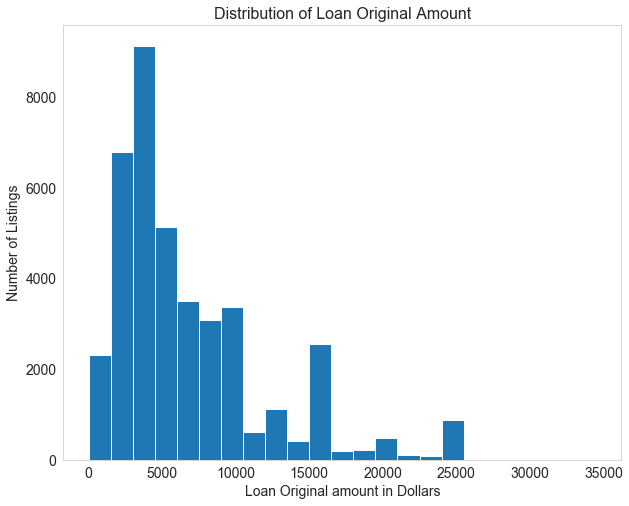

In [758]:
plt.figure(figsize = [10, 8]) 

bins = np.arange(0,df_var_clean['LoanOriginalAmount'].max(),1500)
plt.hist(data = df_var_clean, x = 'LoanOriginalAmount',bins=bins)
plt.title('Distribution of Loan Original Amount',fontsize = 16)
plt.xlabel('Loan Original amount in Dollars',fontsize = 14)
plt.ylabel('Number of Listings',fontsize=14)
plt.xticks(fontsize=14,rotation=0);
plt.yticks(fontsize=14);

People ask for values between $\$$3750 - 5000 and next $\$$1250-2500

### What is the length of the Loan?

Here we would like to know how long most loans would last provided the required monthly payment is made.

#### Term

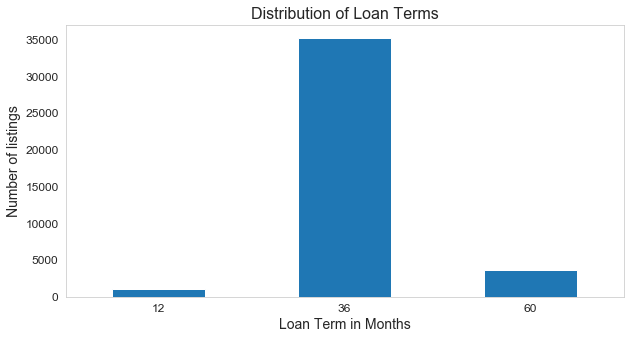

In [759]:

plt.figure(figsize=(10, 5))
ind=[12,36,60]
term_counts = df_var_clean['Term'].value_counts()[ind] 
term_counts.plot(kind='bar', width = 0.5)
plt.title('Distribution of Loan Terms',fontsize = 16)
plt.xticks(rotation = 0,fontsize = 12);
plt.yticks(fontsize = 12);
plt.ylabel('Number of listings',fontsize = 14)
plt.xlabel('Loan Term in Months',fontsize = 14);


So here, most borrowers opt for longer loan terms, with 3 years being the highest.

In [760]:
df_var_clean.groupby('Term')['LoanOriginalAmount'].mean().sort_values(ascending=False)

Term
60    10921.119658
36     6200.559013
12     4647.545374
Name: LoanOriginalAmount, dtype: float64

So of course, with higher loan principal amount, you are likely to go for longer loan terms. As shown above, those who opt for 60 Month loan term had the higest loan original amount.

### How much is the scheduled monthly loan payment

Based on loan original mount, how much are borrowers scheduled to pay monthly?

#### Monthly Loan Payment

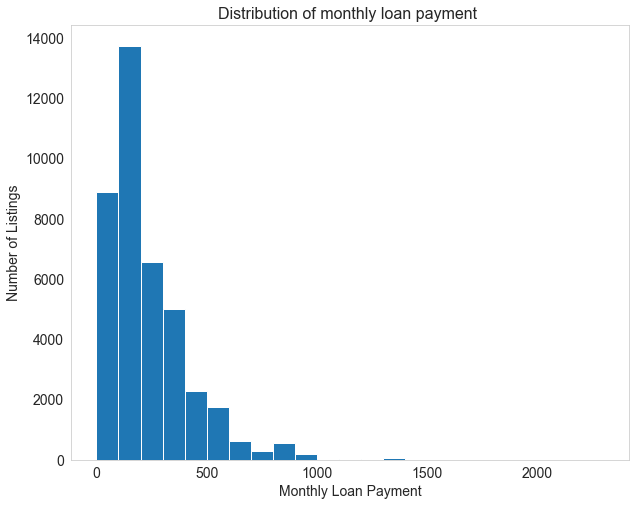

In [761]:
plt.figure(figsize = [10, 8]) 

bins = np.arange(0,df_var_clean['MonthlyLoanPayment'].max()+ 100,100)
plt.hist(data = df_var_clean, x = 'MonthlyLoanPayment',bins=bins)
plt.ylabel('Number of Listings',fontsize=14)
plt.xlabel('Monthly Loan Payment',fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of monthly loan payment ',fontsize = 16);

Borrowers pay between $\$$100-200. This makes a lot of sense considering that the highest amount of loan falls in the range $\$$3500-5000 and the loan goes for a maximum year of 3 years. 

## Borrower's information 

What we will know by the end of this section is information that can be used to predict the borrower's likelihood if defaulting a loan.

### Borrower's State of Residence

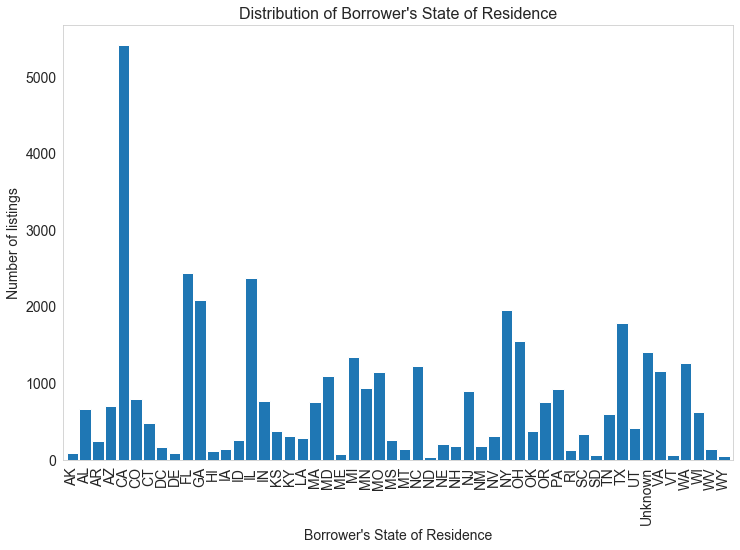

In [762]:
plt.figure(figsize = [13, 5]) 
state_count = df_var_clean['BorrowerState'].value_counts()
state_index = state_count.index.sort_values()

state_count[state_index].plot(kind='bar', width = 0.9, figsize = (12,8))
plt.title('Distribution of Borrower\'s State of Residence',fontsize = 16)
plt.xticks(rotation = 90,fontsize = 14);
plt.yticks(fontsize = 14);
plt.ylabel('Number of listings',fontsize = 14)
plt.xlabel('Borrower\'s State of Residence',fontsize = 14);



Most borrowers live in California (CA), this may be because Prosper is located in CA.

### Occupation

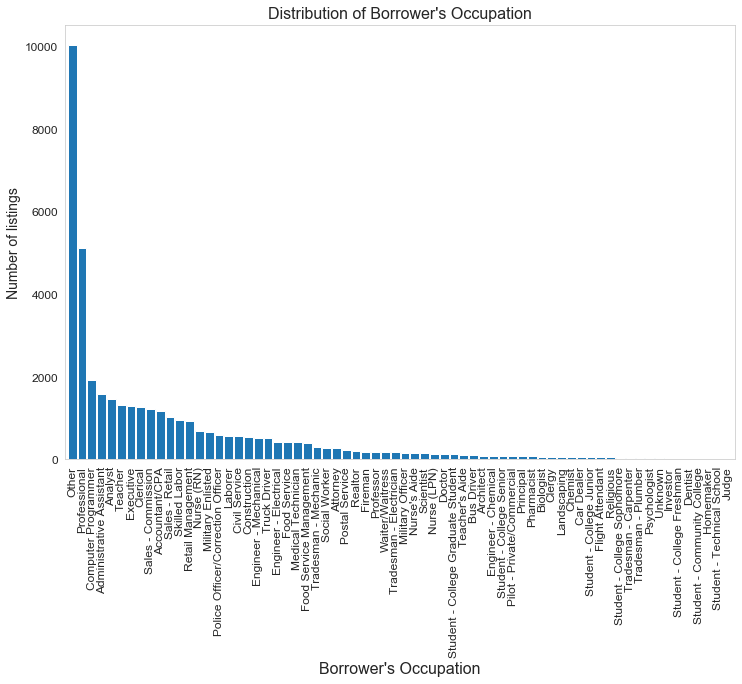

In [763]:
plt.figure(figsize = [13, 5]) 
occu_count = df_var_clean['Occupation'].value_counts()
occu_count.plot(kind='bar', width = 0.9,figsize = (12,8))
plt.title('Distribution of Borrower\'s Occupation',fontsize = 16)
plt.xticks(rotation = 90,fontsize = 12);
plt.yticks(fontsize = 12);
plt.ylabel('Number of listings',fontsize = 14)
plt.xlabel('Borrower\'s Occupation',fontsize = 16);

Most borrowers indicated 'other' as their occupation. Probably they didnt want to disclose this information. The next top occupation are professionals then Computer Programmers, who obviously are likely to repay their loans since they are expected to have high monthly income.

However one might ask, why would a professional, or an executive who has a good source of income likely to collect loan? In exploring relationships in the Bivariate section, we will investigate relationship between occupation, monthly income, employment status, listing categories and loan performance. In the meantime, let us look at how much loan each occupation ask for.

In [764]:
j.head()

ListingCategory     LoanOriginalAmount
Debt Consolidation  4000                  2010
                    15000                 1236
                    5000                  1227
                    10000                 1109
                    3000                   921
dtype: int64

Thus on average, Pharmacist then Doctors ask for the highest amount of loan. We also see Dentist asking for a high amount of loan. This doesnt speak well of the medical system, if medical practitioners would have to ask for loans to keep their medical facilities running.

#### What do the medical practicioners need the loan for?

In [765]:
j=df_var_clean.groupby(['ListingCategory', 'LoanOriginalAmount']).size().sort_values(ascending=False)


We see that deb consolidation is the top reason for the three medical practitioners to request for loan.

In [766]:
df_var_clean.groupby('Occupation')['LoanOriginalAmount'].mean().sort_values(ascending=False).head(10)

Occupation
Pharmacist                    10689.972222
Doctor                        10247.566434
Realtor                        9203.699482
Executive                      9106.186350
Dentist                        8997.058824
Attorney                       8893.757895
Principal                      8837.329268
Architect                      8555.526882
Pilot - Private/Commercial     8525.870588
Engineer - Chemical            8432.954545
Name: LoanOriginalAmount, dtype: float64

We see here that Doctors and Dentists on average ask for loan principal which is slightly below their average monthly income while Pharmacist request for loan principal that is higher than their monthly income. 

### What is the borrower's employment status?

In [767]:
employment_status_count= df_var_clean['EmploymentStatus'].value_counts()
employment_status_count

Full-time        21321
Employed         15780
Part-time          828
Self-employed      823
Other              642
Retired            555
Not employed        57
Name: EmploymentStatus, dtype: int64

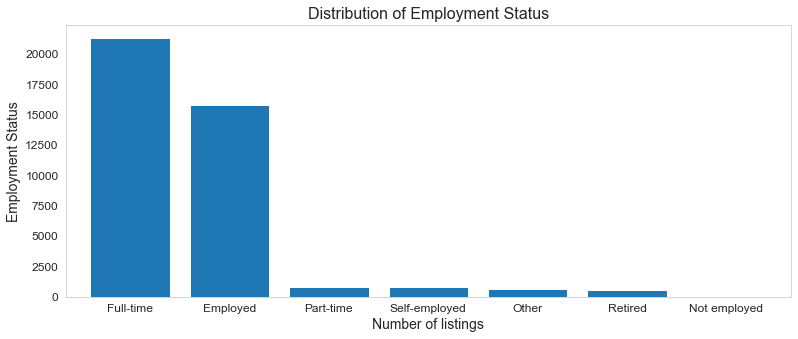

In [768]:
plt.figure(figsize = [13, 5]) 

employment_status_count.plot(kind='bar', width = 0.8)
plt.title('Distribution of Employment Status',fontsize = 16)
plt.xticks(rotation = 0,fontsize = 12);
plt.yticks(fontsize = 12);
plt.xlabel('Number of listings',fontsize = 14)
plt.ylabel('Employment Status',fontsize = 14);

Chart shows that the highest percetage of borrowers are Full-time workers. We will investigate which categrory are more likely to default a loan.

### How many years of experience in their employment status do borrowers have?

#### EmploymentStatusDuration

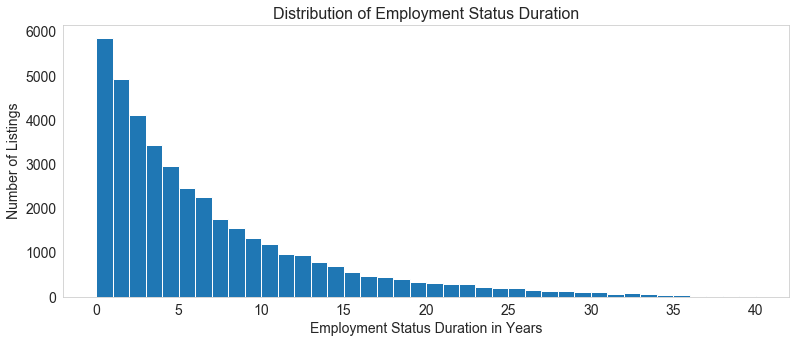

In [769]:
plt.figure(figsize = [13, 5]) 

bins = np.arange(0,df_var_clean['EmploymentStatusDuration'].max()+ 1,1)
plt.hist(data = df_var_clean, x = 'EmploymentStatusDuration',bins=bins);
plt.title('Distribution of Employment Status Duration',fontsize=16)
plt.xlabel('Employment Status Duration in Years', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

The distribution is right skewed. Most workers are new to their occupation, with very little of them close to retirement.

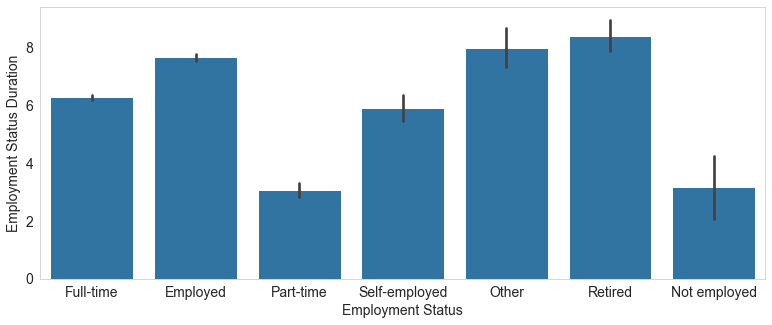

In [770]:
plt.figure(figsize = [13, 5]) 
ind = df_var_clean['EmploymentStatus'].value_counts().sort_values(ascending=False).index
sb.barplot(x="EmploymentStatus", y="EmploymentStatusDuration", data=df_var_clean,color = base_color,order=ind)
plt.xticks(rotation=0, fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('Employment Status', fontsize=14);
plt.ylabel('Employment Status Duration', fontsize=14);

We notice that borrowers with retired employment status do have the longest employmentstatus duration as we expect intuitively. While part-time workers have the shortest employment status duration. Can this information help us predict risky borrowers? We willfind out later in the Bivariate section. 

## Borrower's financial information

### Verified Stated Monthly Income.

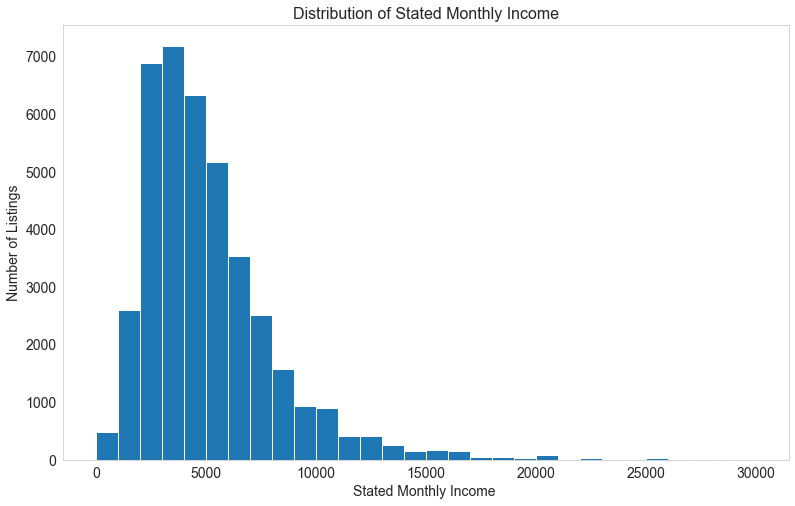

In [771]:
plt.figure(figsize = [13, 8]) 

bins = np.arange(0,df_var_clean['StatedMonthlyIncome'].max()+ 1000,1000)
plt.hist(data = df_var_clean, x = 'StatedMonthlyIncome',bins=bins);
plt.title('Distribution of Stated Monthly Income',fontsize=16)
plt.xlabel('Stated Monthly Income ', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

The monthly salary range of most borrowers is between $\$$3000-4000.

### Bank Card Utilization

How much percentage have borrowers used up in their Bank cards at the time their credit profile was pulled?

In [772]:
df_var_clean['BankcardUtilization'].describe()

count    40006.000000
mean         0.552647
std          0.339389
min          0.000000
25%          0.260000
50%          0.600000
75%          0.860000
max          2.000000
Name: BankcardUtilization, dtype: float64

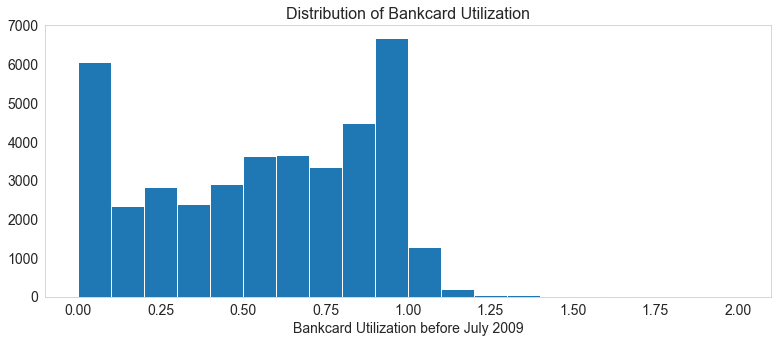

In [773]:
plt.figure(figsize = [13, 5]) 

bins = np.arange(0,df_var_clean['BankcardUtilization'].max()+ 0.1,0.1)
plt.hist(data = df_var_clean, x = 'BankcardUtilization',bins=bins);
plt.title('Distribution of Bankcard Utilization',fontsize = 16);
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
#plt.ylabel('Number of Listings',fontsize = 14)
plt.xlabel('Bankcard Utilization before July 2009',fontsize = 14);

On average, the proportion of bankcard utilization is 0.55. 25% of borrower's bankcard utilization is 0.25 and 75% of borrower's bankcard utilization is 0.86. That is most borrower's have used up about 86% of their bankcard credit.

### Debt to Income Ratio

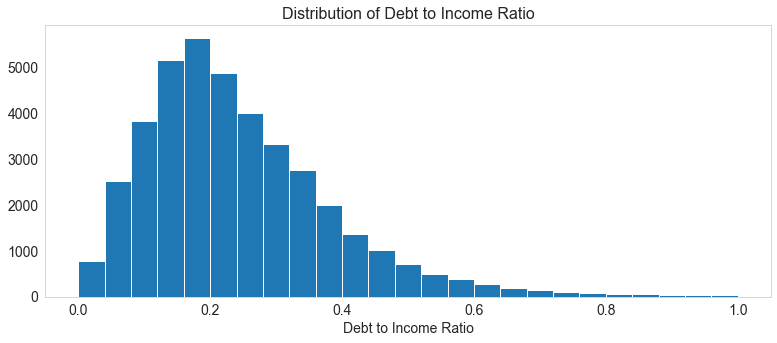

In [774]:
plt.figure(figsize = [13, 5]) 

bins = np.arange(0,df_var_clean['DebtToIncomeRatio'].max()+ 0.04,0.04)
plt.hist(data = df_var_clean, x = 'DebtToIncomeRatio',bins=bins);
plt.title('Distribution of Debt to Income Ratio',fontsize = 16);
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
#plt.ylabel('Number of Listings',fontsize = 14)
plt.xlabel('Debt to Income Ratio',fontsize = 14);

The lower this ratio, the less risky a borrower is likely to be. Chart shows that most borrowers has debt-to-income ratio below 43%, which makes them prospective borrowers.

### Available bankcard credit

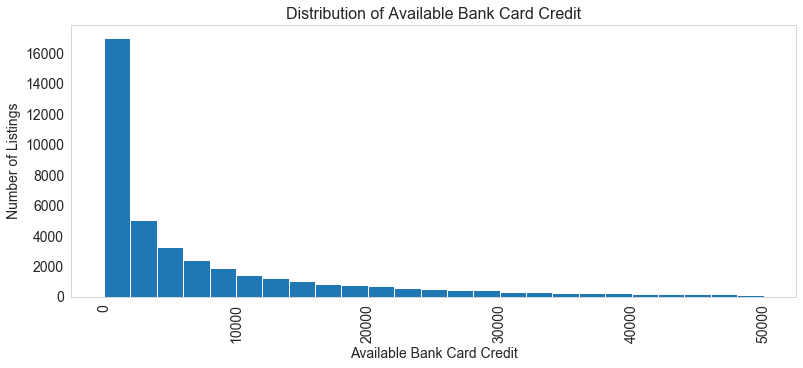

In [775]:
plt.figure(figsize = [13, 5]) 

bins = np.arange(0,df_var_clean['AvailableBankcardCredit'].max()+ 2000,2000)
plt.hist(data = df_var_clean, x = 'AvailableBankcardCredit',bins=bins);
plt.title('Distribution of Available Bank Card Credit',fontsize=16)
plt.xlabel('Available Bank Card Credit', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14);


The histogram shows that most borrowers have about $\$$ 0-2500 in their credit card.

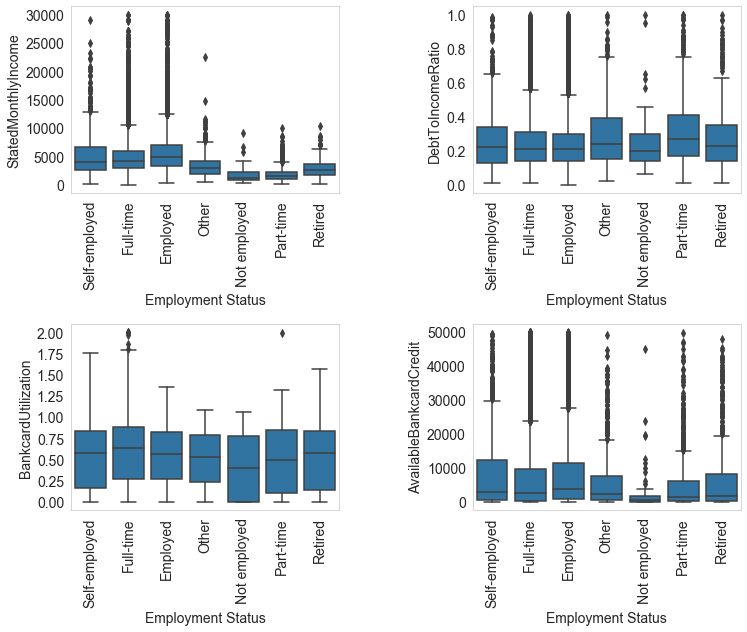

In [776]:
ep_terms = ["StatedMonthlyIncome", "DebtToIncomeRatio", "BankcardUtilization",
           "AvailableBankcardCredit"]
fig = plt.figure(figsize=(12, 7))


for i, var in enumerate(ep_terms):
    ax = fig.add_subplot(2, 2, i+1)
    plt.subplots_adjust(left=None, bottom=0, right=None, top=1, wspace=0.5, hspace=0.7)
    sb.boxplot(y=var, x="EmploymentStatus", data=df_var_clean, color = base_color)
    plt.xticks(fontsize=14,rotation=90)
    plt.yticks(fontsize=14)
    plt.xlabel('Employment Status',fontsize=14)
    plt.ylabel(var,fontsize = 14);
    

Looking at income and some credit availability of each employment status, we see part-time workers 
* have the lowest stated monthly income 
* The highest debt-to-income ratio
* The proportion of their bankcard Utilization is also on the high side even though it is not the highest as compared to other employment status
* Lastly they have the smallest portion of available bankcard credit.

Will these information tell us anything about risky borrowers?

### Are there borrowers who are home owners?

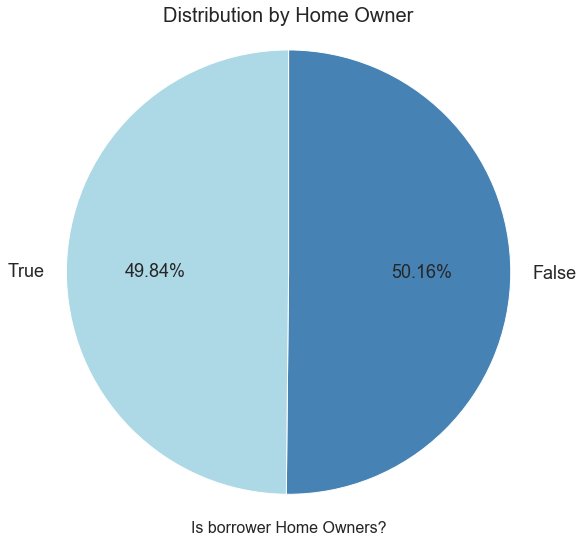

In [777]:
home_owner_count = (df_var_clean['IsBorrowerHomeowner'].value_counts()/df_var_clean.shape[0])
plot_prop = home_owner_count.plot.pie(figsize=(9,9),fontsize = 18,autopct='%1.2f%%',startangle=90,counterclock=False,colors = ['steelblue', 'lightblue'] )
plot_prop.set_title('Distribution by Home Owner', fontsize = 20)
plt.axis('square')
plt.ylabel('')
plt.xlabel('Is borrower Home Owners?', Fontsize = 16);


The pie chart shows that there are more borrowers who do not have a home. Precisely, 50.68% of borrowers do not have a home while 49.32% do.

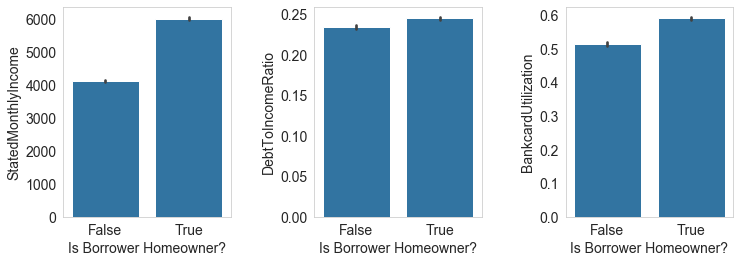

In [778]:
y1_terms = ["StatedMonthlyIncome", "DebtToIncomeRatio", 'BankcardUtilization']
fig = plt.figure(figsize=(12, 7))


for i, var in enumerate(y1_terms):
    ax = fig.add_subplot(2, 3, i+1)
    plt.subplots_adjust(left=None, bottom=0, right=None, top=1, wspace=0.5, hspace=0.4)
    sb.barplot(y=var, x="IsBorrowerHomeowner", data=df_var_clean, color = base_color)
    plt.xticks(fontsize=14,rotation=0)
    plt.yticks(fontsize=14)
    plt.xlabel('Is Borrower Homeowner?',fontsize=14)
    plt.ylabel(var,fontsize = 14);
    

Observe that those who own a home have a verified statedmonhtly income that is higher than those who do not own a home. On the other hand, the homeowners have a higher proportion of Debt-to-income ratio and bank card utilization respectively. We will explore later whether homeowners are more likely to default aloan or not.

## How do Lender's use Borrower's information and expenses to make decisions?

From these links [ProsperScore](https://www.prosper.com/help/topics/general-prosper_score.aspx) and [ProsperRating](https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline), we can find various factors that Lenders consider before they make decisions whether a borrower will be granted a loan and at what interest rate. 

In this section, we will investigate some of these factors.

## Borrower's credit history

### Current Delinquencies

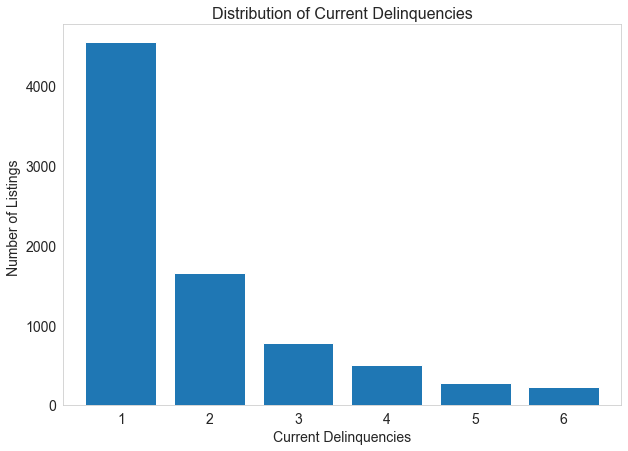

In [779]:
plt.figure(figsize = [10, 7]) 

cd_count = df_var_clean_del['CurrentDelinquencies'].value_counts().head(10)
ind = cd_count.index.sort_values()
cd_count[ind].plot(kind = 'bar',width=0.8)
plt.title('Distribution of Current Delinquencies',fontsize=16)
plt.xlabel('Current Delinquencies', fontsize=14)
plt.ylabel('Number of Listings ', fontsize=14)
plt.xticks(rotation = 0, fontsize=14)
plt.yticks(fontsize=14);




we recall in the data cleaning process part 3, we observe that most borrwers have zer (0) current delinquences. We had to rescale the axes to exclude 0. Keeping that in mind, we observe in these charts that the current delinquency is right skewed

#### Delinquencies Last 7 years

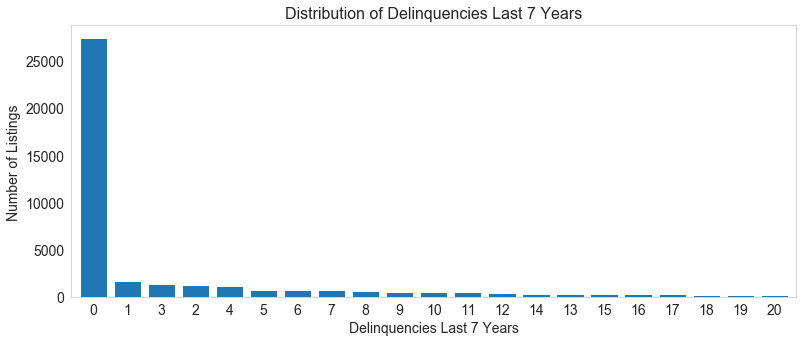

In [780]:
plt.figure(figsize = [13, 5]) 
dp_count = df_var_clean['DelinquenciesLast7Years'].value_counts()
dp_count.plot(kind = 'bar',width=0.8)
plt.title('Distribution of Delinquencies Last 7 Years',fontsize=16)
plt.xlabel('Delinquencies Last 7 Years', fontsize=14)
plt.ylabel('Number of Listings ', fontsize=14)
plt.xticks(rotation = 0, fontsize=14)
plt.yticks(fontsize=14);

Most population of borrowers dont seem to have history of delinquencies.

## Borrower's Credit Scores

### 1) Credit Score Range

In [781]:
sorted_counts_new = df_since2009['CreditScoreRange'].value_counts()
sorted_counts_old = df_before2009['CreditScoreRange'].value_counts()
print(sorted_counts_new)
print('\n{}'.format(sorted_counts_old))

Good (680-739)         9104
Fair (600-679)         7383
Very Good (740-799)    4890
Exceptional (800+)     1145
Name: CreditScoreRange, dtype: int64

Fair (600-679)         7356
Good (680-739)         4372
Poor (300-599)         2920
Very Good (740-799)    2353
Exceptional (800+)      483
Name: CreditScoreRange, dtype: int64


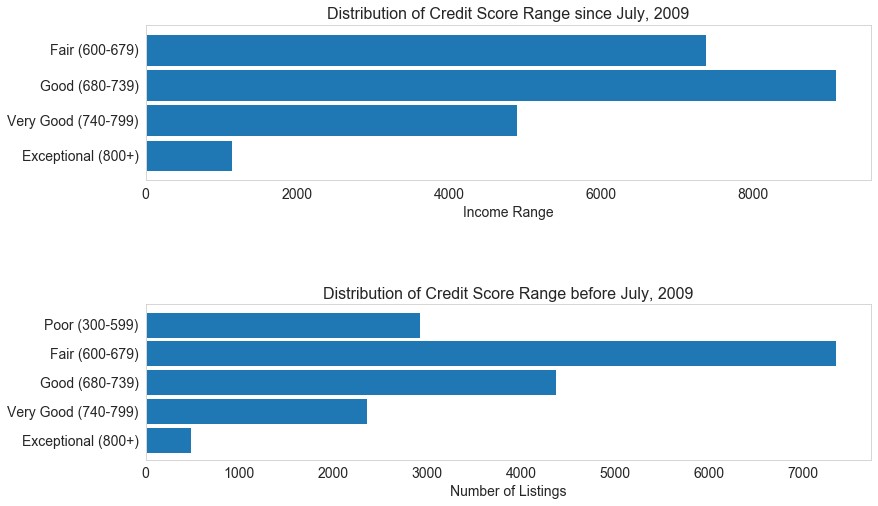

In [782]:

plt.figure(figsize = [13, 8]) 

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.8)
plt.subplot(2, 1, 1)

index = ['Exceptional (800+)','Very Good (740-799)','Good (680-739)','Fair (600-679)']
sorted_counts_new[index].plot(kind = 'barh',width=0.9)
plt.title('Distribution of Credit Score Range since July, 2009',fontsize = 16)
#plt.ylabel('Number of Listings', fontsize =14)
plt.xlabel('Income Range', fontsize =14)
plt.xticks(rotation = 0,fontsize = 14)
plt.yticks(fontsize = 14);

plt.subplot(2, 1, 2)
index1 = ['Exceptional (800+)','Very Good (740-799)','Good (680-739)','Fair (600-679)','Poor (300-599)']

sorted_counts_old[index1].plot(kind = 'barh',width=0.9)
plt.title('Distribution of Credit Score Range before July, 2009',fontsize = 16)
plt.xlabel('Number of Listings', fontsize =14)
#plt.ylabel('Income Range', fontsize =14)
plt.xticks(rotation = 0,fontsize = 14)
plt.yticks(fontsize = 14);




We notice that the new underlying Prosper rule does not accept listings with credit score range below 600 unlike in the previous underlying rule. We notice that for lstings before July 2009, most borrowers had fair credit score range while for listings since July 2009, most borrowers have good credit score range. The question is, do these borrower's have good Prosper Score or rating?

### Prosper Score

This ProsperScore is only applicable to listings created since July 2009.

In [783]:
score_count = df_since2009['ProsperScore'].value_counts()
score_count

8     4091
6     3439
5     2832
7     2823
9     2789
4     2383
3     1355
10    1291
2     1107
1      390
11      22
Name: ProsperScore, dtype: int64

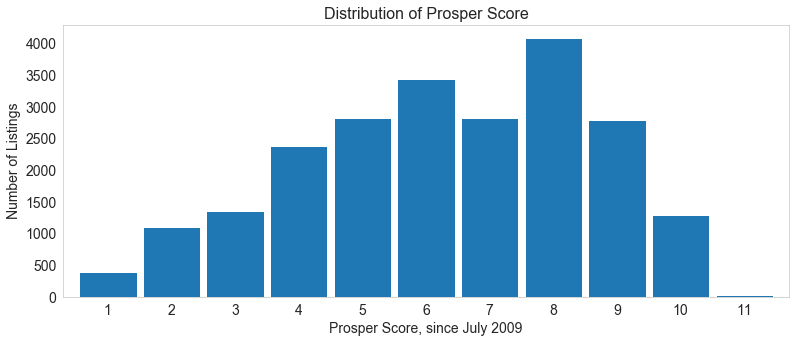

In [784]:
indi = score_count.index.sort_values()
score_count[indi].plot(kind = 'bar',figsize=(13,5),width=0.9)
#df_clean['CreditGrade'].value_counts().plot(kind = 'bar',figsize=(12,4),width=0.3)
plt.title('Distribution of Prosper Score',fontsize = 16)
plt.ylabel('Number of Listings', fontsize =14)
plt.xlabel('Prosper Score, since July 2009', fontsize =14)
plt.xticks(rotation = 0,fontsize = 14)
plt.yticks(fontsize = 14);

Most borrowers recieved a prosper score of 8, then 6 which seem to be good enough. What we might want to investigate later in the Bivariate exploratory section is the Prosper Score assigned to different credit score range categories.

### ProsperRating (Alpha) / CreditGrade

ProsperRating (Alpha) is applicable to listings created since July 2009 while credit grade is applicable to listings created before July 2009.

In [785]:
rate_count = df_since2009['ProsperRatingAlpha'].value_counts()
rate_count1 = df_before2009['CreditGrade'].value_counts()

ind = ['AA','A','B','C','D', 'E', 'HR']
ind1 = ['AA','A','B','C','D', 'E', 'HR', 'Unknown']

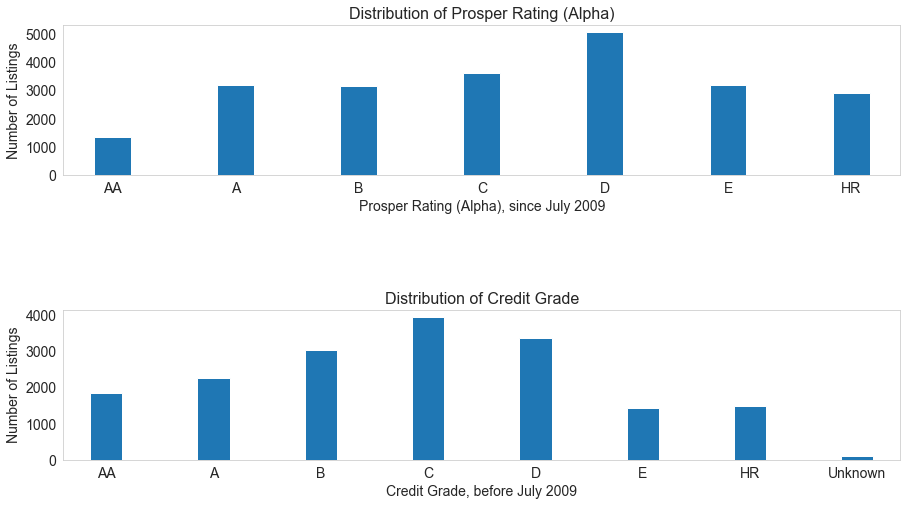

In [786]:
plt.figure(figsize = [13, 5]) 

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.9)


plt.subplot(2, 1, 1)
rate_count[ind].plot(kind = 'bar',figsize=(15,8),width=0.3)
#df_clean['CreditGrade'].value_counts().plot(kind = 'bar',figsize=(12,4),width=0.3)
plt.title('Distribution of Prosper Rating (Alpha)',fontsize = 16)
plt.ylabel('Number of Listings', fontsize =14)
plt.xlabel('Prosper Rating (Alpha), since July 2009', fontsize =14)
plt.xticks(rotation = 0,fontsize = 14)
plt.yticks(fontsize = 14);

plt.subplot(2,1,2)
rate_count1[ind1].plot(kind = 'bar',figsize=(15,8),width=0.3)
#df_clean['CreditGrade'].value_counts().plot(kind = 'bar',figsize=(12,4),width=0.3)
plt.title('Distribution of Credit Grade',fontsize = 16)
plt.ylabel('Number of Listings', fontsize =14)
plt.xlabel('Credit Grade, before July 2009', fontsize =14)
plt.xticks(rotation = 0,fontsize = 14)
plt.yticks(fontsize = 14);

We see that most listings created since July 2009 had prosper rating of D while most for listings created before July 2009, we see Credit Grade C has the highest count. One thing we will investigate later is if borrowers Prosper score and prosper rating is concitent.

In [787]:
df_before2009.groupby(['CreditScoreRange', 'ProsperScore']).size()

CreditScoreRange     ProsperScore
Exceptional (800+)   6                483
Fair (600-679)       6               7356
Good (680-739)       6               4372
Poor (300-599)       6               2920
Very Good (740-799)  6               2353
dtype: int64

## Granting the Loan Application

### Borrower's Interest Rate

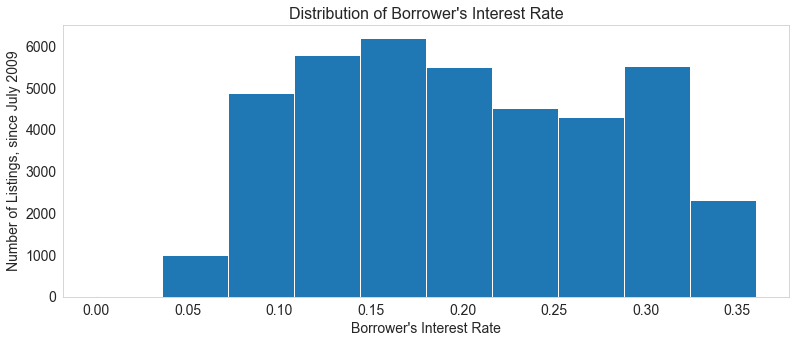

In [788]:
plt.figure(figsize = [13, 5]) 


bins = np.arange(0,df_var_clean['BorrowerRate'].max(),0.025)
plt.hist(data = df_var_clean, x = 'BorrowerRate');
plt.title('Distribution of Borrower\'s Interest Rate',fontsize = 16);
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Number of Listings, since July 2009',fontsize = 14)
plt.xlabel('Borrower\'s Interest Rate',fontsize = 14);


Borrower's pay an interest of 20.38% on average. 25% of borrowers pay 13.94% interest rate while 75% pay 27.00% interest rate, all before interest.

### Borrower's Annual Percentage Rate (APR)

In [789]:
df_var_clean['BorrowerAPR'].describe()

count    40006.000000
mean         0.225056
std          0.087740
min          0.006530
25%          0.152587
50%          0.216890
75%          0.295540
max          0.423950
Name: BorrowerAPR, dtype: float64

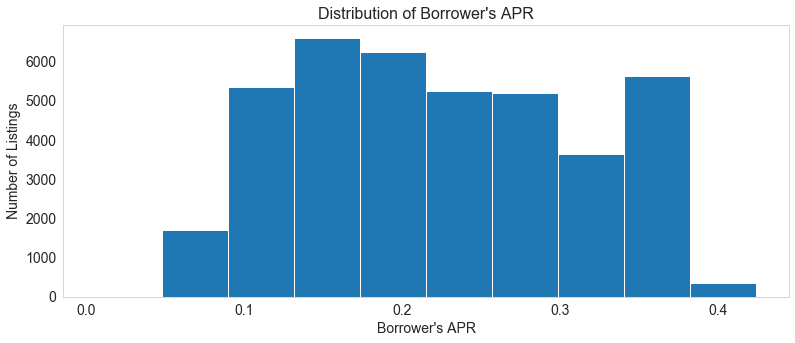

In [790]:
plt.figure(figsize = [13, 5]) 

bins = np.arange(0,df_var_clean['BorrowerAPR'].max()+ 0.02,0.02)
plt.hist(data = df_var_clean, x = 'BorrowerAPR');
plt.title('Distribution of Borrower\'s APR',fontsize = 16);
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Number of Listings',fontsize = 14)
plt.xlabel('Borrower\'s APR',fontsize = 14);



Borrower's annual percentage rate describes borrower's interest rate plus the cost of borrowing the money. On average, borrower's pay 22.78% APR, 25% pay 15.59% while 75% pay 30.00%.

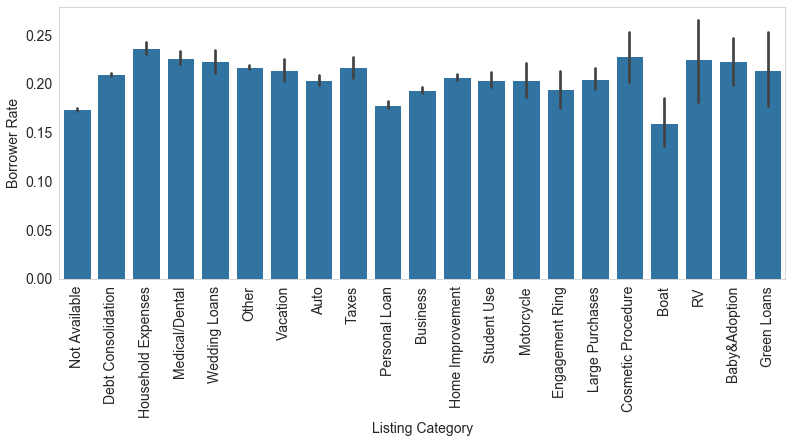

In [791]:
plt.figure(figsize = [13,5]) 
sb.barplot(x="ListingCategory", y='BorrowerRate', data=df_var_clean, color = base_color)
plt.xticks(rotation=90, fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('Listing Category', fontsize=14);
plt.ylabel('Borrower Rate', fontsize=14);

We see that some loans have lower interest rate than others. Loans for household expenses has the highest interest rate and Boat loans the least borrower's rate. 

### Determinant of MonthlyLoanPayment

#### MonthlyLoanPayment, LoanOriginalAmount, LoanTerm, BorrowerRate and BorrowerAPR 

Posper offer "fully amortizing loan", thus to calculate the amount a borrower would pay monthly for a loan, the loan original amount, loan term and borrower's annual percentage rate are to be considered. 

In this section, we will look at these relations.

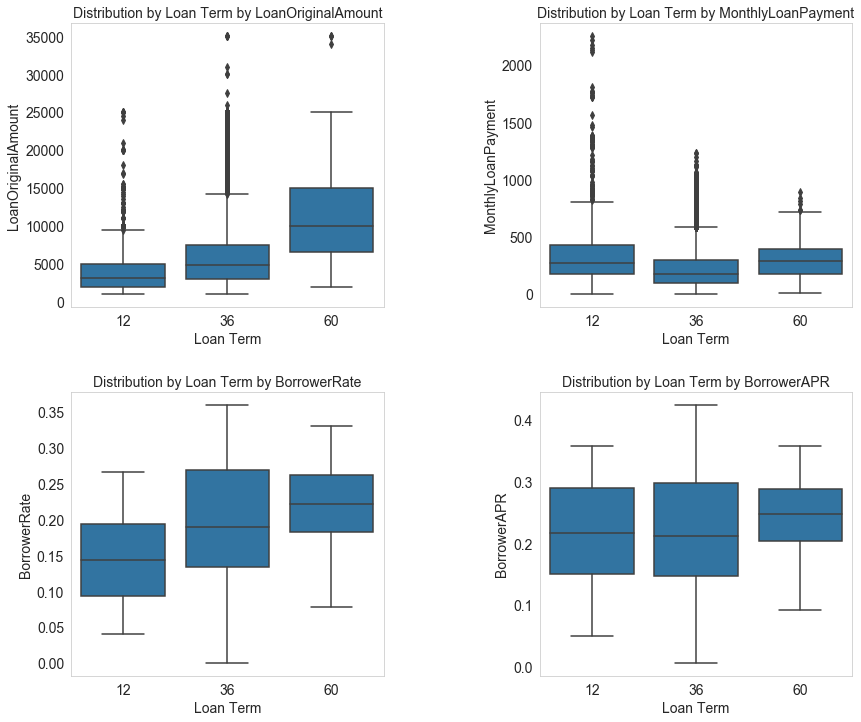

In [792]:
loan_payment_terms = ['LoanOriginalAmount','MonthlyLoanPayment','BorrowerRate','BorrowerAPR'] #list of medical conditions
legends_ = {'legend.fontsize': 18,'legend.handlelength': 2.5}
plt.rcParams.update(legends_)

fig = plt.figure(figsize=(14, 12))
    

for i, terms in enumerate(loan_payment_terms):
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.3)


    ax = fig.add_subplot(2, 2, i+1)
          
    plot_term = sb.boxplot(data = df_var_clean, x = 'Term', y = terms, color = base_color);
    plot_term.set_title('Distribution by Loan Term by ' + terms,fontsize=14);
    plot_term.set_xlabel('Loan Term', fontsize=14);
    plot_term.set_ylabel(terms, fontsize=14);
    plt.yticks(fontsize=14);
    plt.xticks(fontsize=14);

At first glance, it’s hard to know which loan is cheaper. One lender offers a lower interest rate but charges a higher fee. The monthly payment is almost equal.

That’s when APR comes in: The first loan has an APR of 11.6% and the second loan has an APR of 12.1%, making the first loan the less expensive option overall.

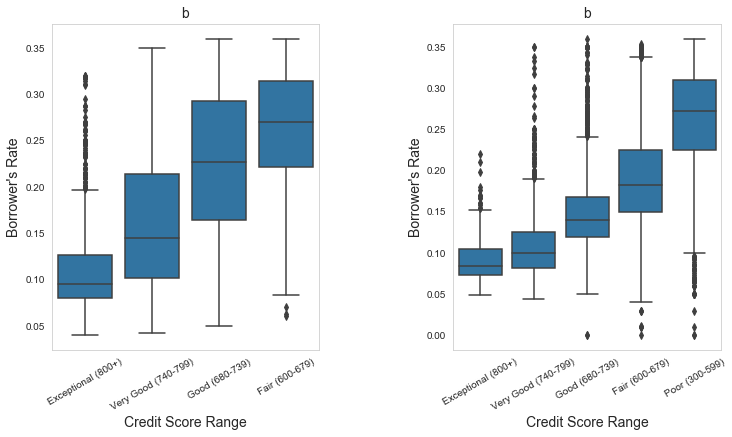

In [793]:
plt.figure(figsize = (12, 6)) 

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.8)


plt.subplot(1,2,1)
sb.boxplot(data = df_since2009, x = 'CreditScoreRange', y = 'BorrowerRate', color = base_color, order=index)
plt.title('b',fontsize=14)
plt.xlabel('Credit Score Range', fontsize=14)
plt.xticks(rotation=30)
plt.ylabel('Borrower\'s Rate', fontsize=14)


plt.subplot(1,2,2)
sb.boxplot(data = df_before2009, x = 'CreditScoreRange', y = 'BorrowerRate', color = base_color, order=index1)
plt.title('b',fontsize=14)
plt.xlabel('Credit Score Range', fontsize=14)
plt.xticks(rotation=30)
plt.ylabel('Borrower\'s Rate', fontsize=14);




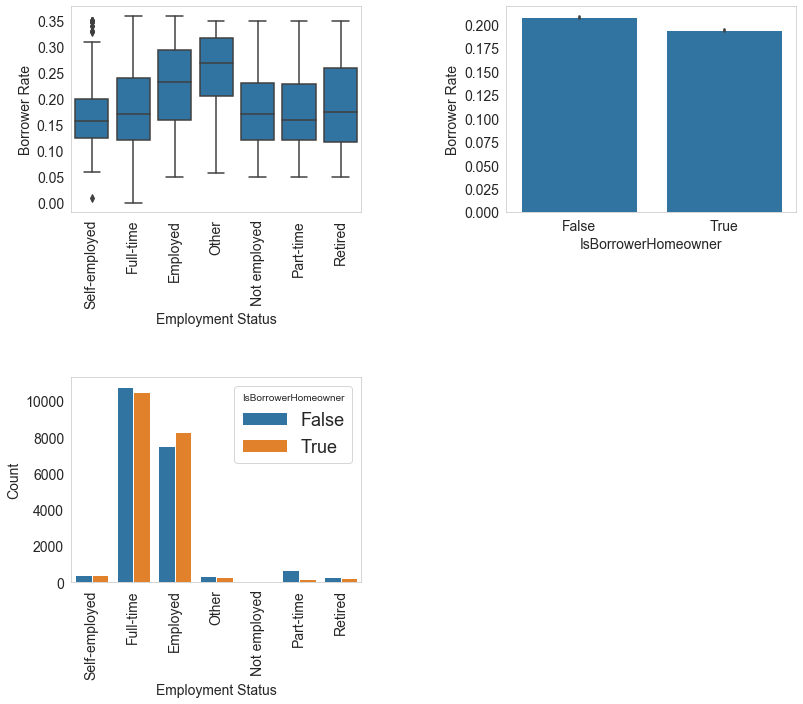

In [794]:
plt.figure(figsize = [13, 5]) 

plt.subplots_adjust(left=None, bottom=0, right=None, top=1.6, wspace=0.5, hspace=0.8)


plt.subplot(2,2,1)
sb.boxplot(y="BorrowerRate", x="EmploymentStatus", data=df_var_clean, color = base_color)
plt.xticks(rotation=90, fontsize=14);
plt.yticks(fontsize=14);
plt.ylabel('Borrower Rate', fontsize=14);
plt.xlabel('Employment Status', fontsize=14);

plt.subplot(2,2,2)
sb.barplot(y="BorrowerRate", x="IsBorrowerHomeowner", data=df_var_clean, color = base_color)
plt.xticks(rotation=0, fontsize=14);
plt.yticks(fontsize=14);
plt.ylabel('Borrower Rate', fontsize=14);
plt.xlabel('IsBorrowerHomeowner', fontsize=14);

plt.subplot(2,2,3)
sb.countplot(x="EmploymentStatus", hue="IsBorrowerHomeowner", data=df_var_clean)
plt.xticks(rotation=90, fontsize=14);
plt.yticks(fontsize=14);
plt.ylabel('Count', fontsize=14);
plt.xlabel('Employment Status', fontsize=14);




So here we see that borrowers who listed their employment status as 'Other' have the highest interest rate. These ones have been shown to more likely default their loan. Likewise, Part-time workers who are less likely to default their loan are seen to have the least BorrowerRate. 


The question to ask now, what factors does Prosper consider when maiking their decision?

Obviously, the distribution of homeowners is not a strong indicator since those without a home have a higher borrower's interest rate and we see from the Employment status vs Is borrower home owner relationship, more of part time workers  do not own a home. We will dive deeper into this later, for now let us investigate more on those who are likely to default a loan.



## Univariate Exploration

### Listings since July 2009 vs before july 2009

To summarize the univariate exploration section, let us briefly describe the two underlying Prosper laws, listings before July 2009 and Listings after July 2009. Something attractive is the acceptable CreditScoreRange between the two laws. with the old law (which is applicable for listings created before July 2009), Borrowers with CreditScoreRange below 600 were granted a loans. This had effect on the number of bad loans as it was high. However with the new law, Prosper decided that CreditScoreRange below 600 were no longer accepted. This improved the creditbility of borrowers and reduced the number of bad loans as compared to the old Prosper law. 

### Target (Dependent) variable: _LoanStatus_

The distribution of our target variable 'LoanStatus' shows that bad loans (including default, delinquencies and charge-offs LoanStatus respectively) are two times less than good loans (completed LoanStatus). Precisely, about 66.66% of the loans were good and 33.33% of the loans were bad. 

Something interesting that we investigated is the distribution of LoanStatus based on listings that were created before July 2009 and Since July 2009. The distribution shows that with the new underlying Prosper laws, there are likely more good loans than bad loans. 

There were no unusual points in the LoanStatus distribution. An adjustment I made was to classify all default, delinquencies and charge-offs LoanStatus as 'Bad Loans' and I tagged the Completed LoanStatus as good loan. Since our interest is to predict whether a borrower would default or not, we found that 'Current' LoanStatus would not be useful for our analysis thus we filtered dataset to exclude Listings with Current LoanStatus.



### Other (Independent) Variables.


The Prosper Loan data is pretty clean and needed just little modifications such as removing outliers and data conversion. I created a new variable 'CreditScoreRange' from a combination of two independent variables. Specifically,

> CreditScoreRange = CreditScoreRangeUpper - CreditScoreRangeLower

I removed outliers in some variables like BankcardUtilization, DebtToIncomeRatio, StatedMonthlyIncome, AvailableBankcardCredit, EmploymentStatusDuration. When I looked at the StatedMonthlyIncome, the maximum amount which was over $\$$62000 was way too high compared to other values. Again for a person with such earning and obtaining a loan of $\$$5000 to pay off in 3 years, it doesn't seem to make sense. Thus I had to remove all outliers.

## Bivariate Exploration

In this section, I will investigate relationships between pairs of variables in my
data. First we recall that the objective of this project is to predict a risky borrower. That is a borrower that is likely to default a oloan. Then we see how lenders make decisions based on such risky borrowers.

- investigate relationship between Loan Status and Borrower's financial information

- investigate relationship between Loan Status and Loan Characteristics

- investigate relationship between Loan Status and Borrower's credit history

- investigate relationship between Loan Status and Borrower's personal information

In [795]:
df_var_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40006 entries, 0 to 113935
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Term                      40006 non-null  int64         
 1   LoanStatus                40006 non-null  int64         
 2   LoanOriginalAmount        40006 non-null  int64         
 3   MonthlyLoanPayment        40006 non-null  float64       
 4   IsBorrowerHomeowner       40006 non-null  bool          
 5   ListingCategory           40006 non-null  object        
 6   StatedMonthlyIncome       40006 non-null  float64       
 7   ProsperScore              40006 non-null  int64         
 8   ProsperRatingAlpha        40006 non-null  object        
 9   CreditGrade               40006 non-null  object        
 10  ListingCreationDate       40006 non-null  datetime64[ns]
 11  BankcardUtilization       40006 non-null  float64       
 12  Occupation            

### Correlation Matrix

It is useful to look at the correlation matrix between different variables to understand the strength of relationship that exist between each. This will help us in our bivariate and multivariate analysis.

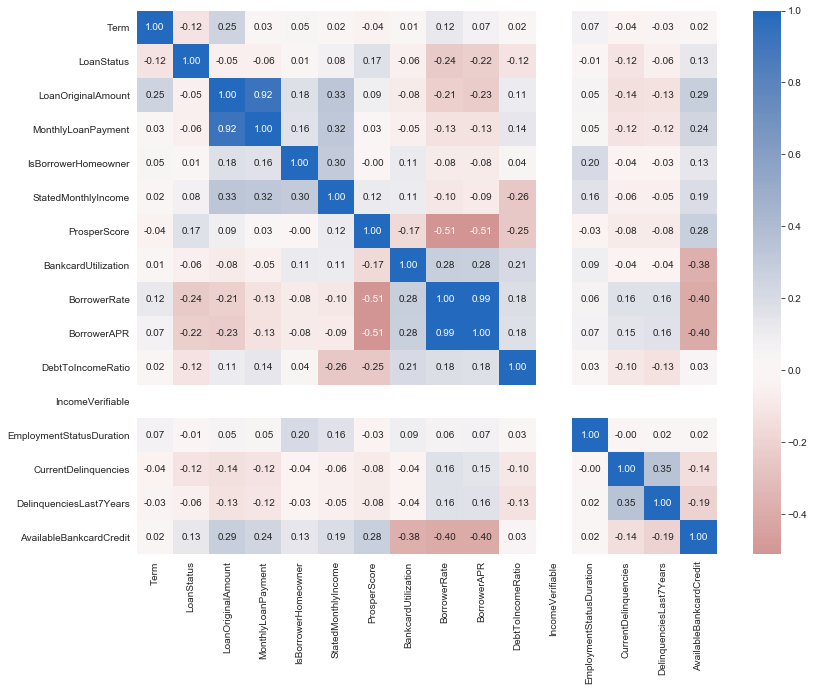

In [796]:
plt.figure(figsize = [13, 10]) 
sb.heatmap(df_var_clean.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

#### Observations

- LoanOriginalAmount and MonthlyLoanPayment have the strongest positive relation with r = 0.92
- ProsperScore and BankcardUtilization has a moderate negative relation with BorrowerRate.
- BorrowerRate has the strongest reationship with LoanStatus.

In [797]:
base_color = sb.color_palette()[0]

## Why do borrowers default their loan?

### 1) BorrowerRate/BorrowerAPR vs LoanStatus

It is expected that a higher interest rate or annual percentage rate (APR) might likely result in increased default percentage. 

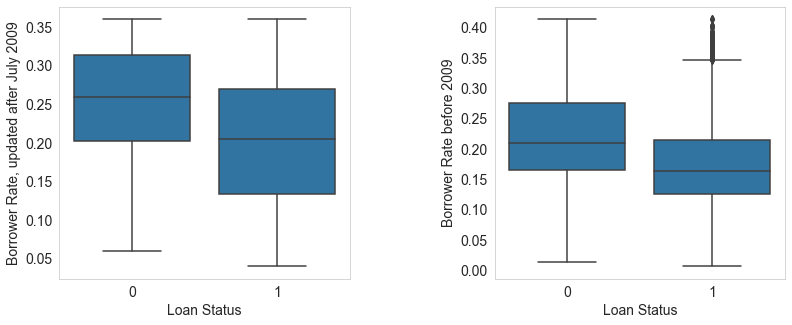

In [798]:
plt.figure(figsize = [13, 5]) 

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

plt.subplot(1,2,1)
sb.boxplot(y="BorrowerRate", x="LoanStatus", data=df_since2009, color = base_color)
plt.xticks(rotation=0, fontsize=14);
plt.yticks(fontsize=14);
plt.ylabel('Borrower Rate, updated after July 2009', fontsize=14);
plt.xlabel('Loan Status', fontsize=14);

plt.subplot(1,2,2)
sb.boxplot(y="BorrowerAPR", x="LoanStatus", data=df_before2009, color = base_color)
plt.xticks(rotation=0, fontsize=14);
plt.yticks(fontsize=14);
plt.ylabel('Borrower Rate before 2009', fontsize=14);
plt.xlabel('Loan Status', fontsize=14);

There we have it, borrowers with higher interest rate and APR default more. But why is this so? We know that riskier borrowers are charged higher interest rate and thus higher APR. The question now is; who are these risky borrowers?

We will now identify risky borrowers based on some borrower's information

### 2) LoanStatus vs verified Income and some indicators of credit availability.

We recall that we areworking with listings with only verified stated monthly income.

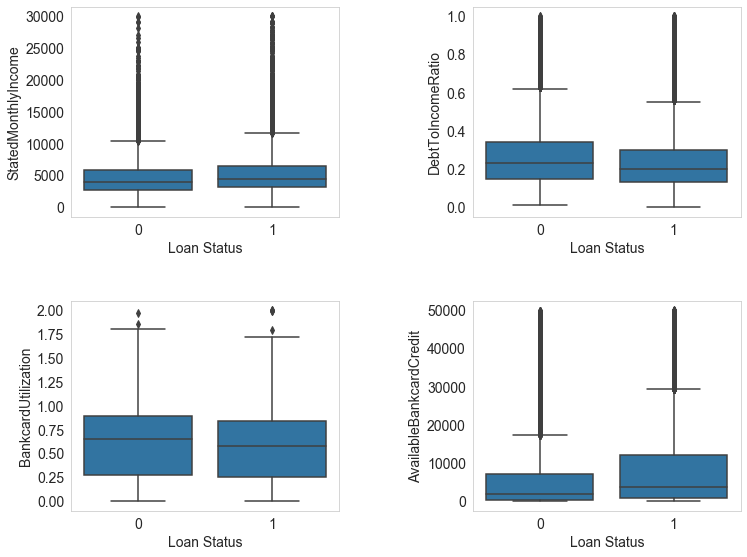

In [799]:
y_terms = ["StatedMonthlyIncome", "DebtToIncomeRatio", "BankcardUtilization",
           "AvailableBankcardCredit"]
fig = plt.figure(figsize=(12, 7))


for i, var in enumerate(y_terms):
    ax = fig.add_subplot(2, 2, i+1)
    plt.subplots_adjust(left=None, bottom=0, right=None, top=1, wspace=0.5, hspace=0.4)
    sb.boxplot(y=var, x="LoanStatus", data=df_var_clean, color = base_color)
    plt.xticks(fontsize=14,rotation=0)
    plt.yticks(fontsize=14)
    plt.xlabel('Loan Status',fontsize=14)
    plt.ylabel(var,fontsize = 14);
    

Intuitively and as shown in the charts above, loans are likely to default

1) if Borrowers have lower income regardless of the loan original amount

2) if the ratio of debt to income is high

3) for borrowers with higher Available bankcard credit

4) if the proportion of bankcard utilization if high 

### 3) LoanStatus vs IsBorrowerHomeowner? 

(0.322951963324696, 0.31582907011736383)

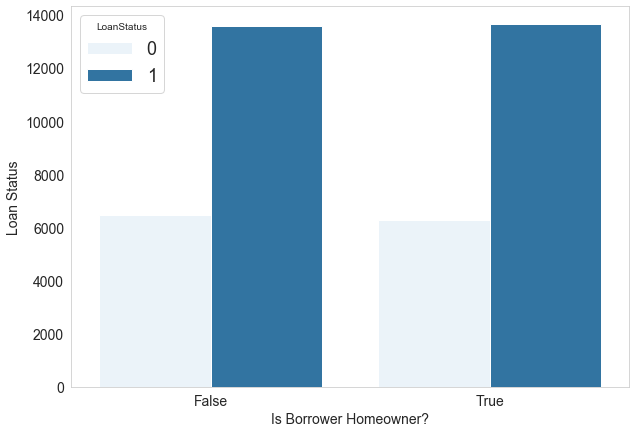

In [800]:
fig = plt.figure(figsize=(10, 7))


sb.countplot(hue= "LoanStatus", x="IsBorrowerHomeowner", data=df_var_clean, color = base_color)
plt.xticks(fontsize=14,rotation=0)
plt.yticks(fontsize=14)
plt.xlabel('Is Borrower Homeowner?',fontsize=14)
plt.ylabel('Loan Status',fontsize = 14);


fi, ti = df_var_clean.query("IsBorrowerHomeowner == False"),df_var_clean.query("IsBorrowerHomeowner == True")
1 - fi["LoanStatus"].mean(),1 -ti["LoanStatus"].mean()

Interestingly, we also see that borrowers who are home owners are less likely to default a loan compared to those who do not own a home. But the difference is small.

### 4) LoanStatus vs Borrower's Ocuupation

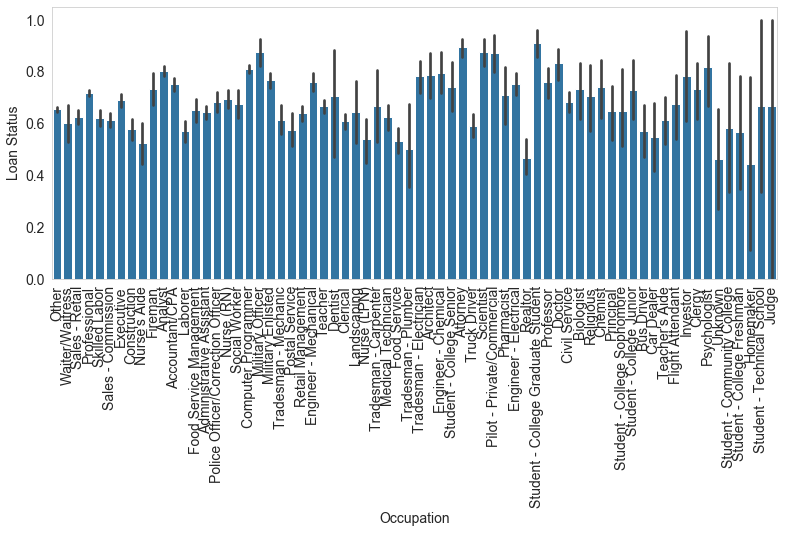

In [801]:
plt.figure(figsize = [13, 5]) 


sb.barplot(x="Occupation", y="LoanStatus", data=df_var_clean, color = base_color)
plt.xticks(rotation=90, fontsize=14);
plt.yticks( fontsize=14);
plt.ylabel('Loan Status', fontsize = 14)
plt.xlabel('Occupation', fontsize=14);

In [802]:
st ,hm= df_var_clean.query("Occupation == 'Student - College Graduate Student'"),df_var_clean.query("Occupation == 'Homemaker'")

1-st["LoanStatus"].mean(),1-hm["LoanStatus"].mean()

(0.08799999999999997, 0.5555555555555556)

We see here that College students are less likely to default a loan. Precisely, they default at 8.80% while Homemakers default 55.56% of the time. 
We see here that Student - College Graduate students with 8.08% rate are less likely to default a loan while Homemakers default most with 55.56% of the time. 



### 4) LoanStatus vs Borrower's financial information

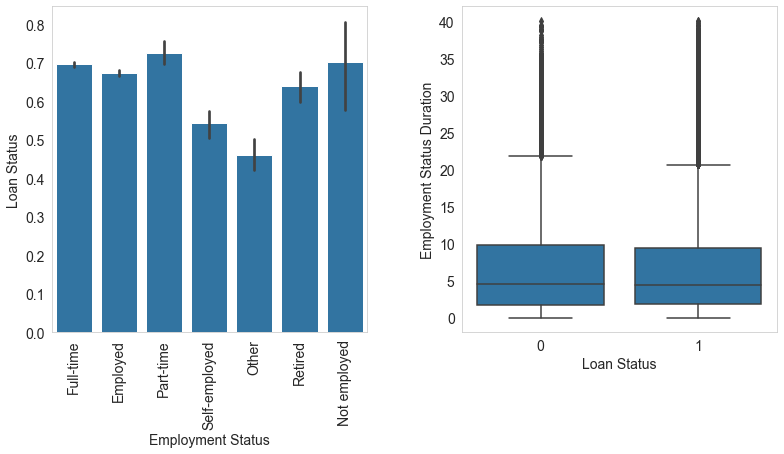

In [803]:
plt.figure(figsize = [13, 6]) 

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)

plt.subplot(1,2,1)
ind = df_var_clean['EmploymentStatus'].value_counts().sort_values(ascending=False).index
sb.barplot(x="EmploymentStatus", y="LoanStatus", data=df_var_clean,color = base_color,order=ind)
plt.xticks(rotation=90, fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('Employment Status', fontsize=14);
plt.ylabel('Loan Status', fontsize=14);


plt.subplot(1,2,2)
sb.boxplot(y="EmploymentStatusDuration", x="LoanStatus", data=df_var_clean, color = base_color)
plt.xticks(rotation=0, fontsize=14);
plt.yticks(fontsize=14);
plt.ylabel('Employment Status Duration', fontsize=14);
plt.xlabel('Loan Status', fontsize=14);


From the relationship between Employment status duration and loan status, we see that those with shorter employment status duration are less likely to default a loan. This is confirmed from the Employment Status vs Loan status barplot, as part-time workers with the shortest employment duration status are more likely to complete their loan.

The question now is that, is this really true or thing of 'chance'?


### 5) LoanStatus vs ListingCategory

When we buy as much as possible with borrowed funds without thinking whether our income is sufficient to repay the loan after meetig our daily requirments, then we are likely to default a loan. 

Here in this section, we will look at the reasons why people want a loan and how they perform with the loan repayment.


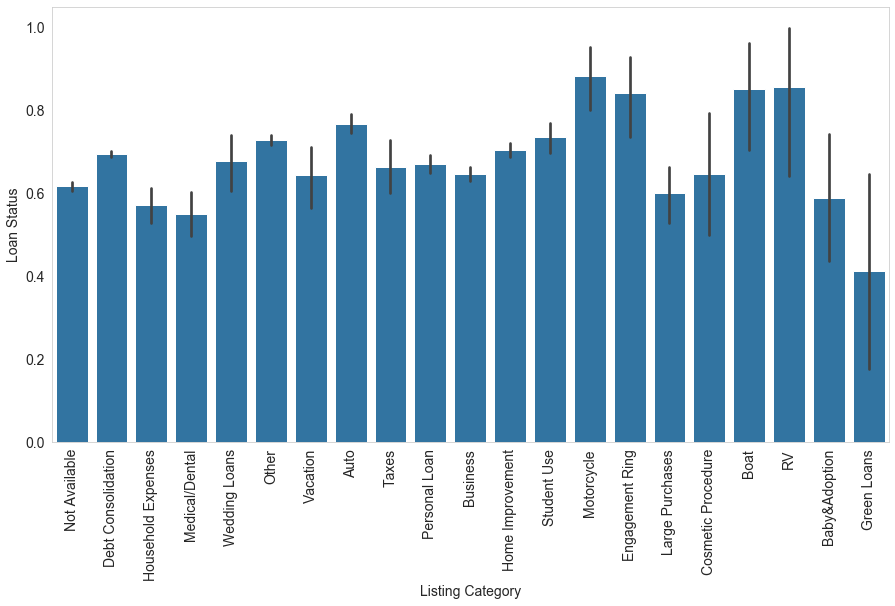

In [804]:
plt.figure(figsize = [15, 8]) 

#ord = df_since2009['BorrowerState'].value_counts().index.sort_values()
sb.barplot(x="ListingCategory", y="LoanStatus", data=df_var_clean, color = base_color)
plt.xticks(rotation=90, fontsize=14);
plt.yticks( fontsize=14);
plt.ylabel('Loan Status', fontsize = 14)
plt.xlabel('Listing Category', fontsize=14);

In [805]:
dc, mc, green = df_var_clean.query("ListingCategory == 'Debt Consolidation'"), df_var_clean.query("ListingCategory == 'Motorcycle'"),df_var_clean.query("ListingCategory == 'Green Loans'")

1 - dc["LoanStatus"].mean(), 1 - mc["LoanStatus"].mean(),1 -green["LoanStatus"].mean()

(0.3038985148514851, 0.11627906976744184, 0.5882352941176471)

So here we see that certain loans perform better than the others. Loans for Motorcycle is seen to default 11.63% of the time, while green loans default 58.82% of the time. Other frequent defaulters are loans for household expenses and for medical and dental work, while people seem to completely pay Engagement Ring , and Motorcycle loans quite frequently.

### 6) LoanStatus vs Borrower's State

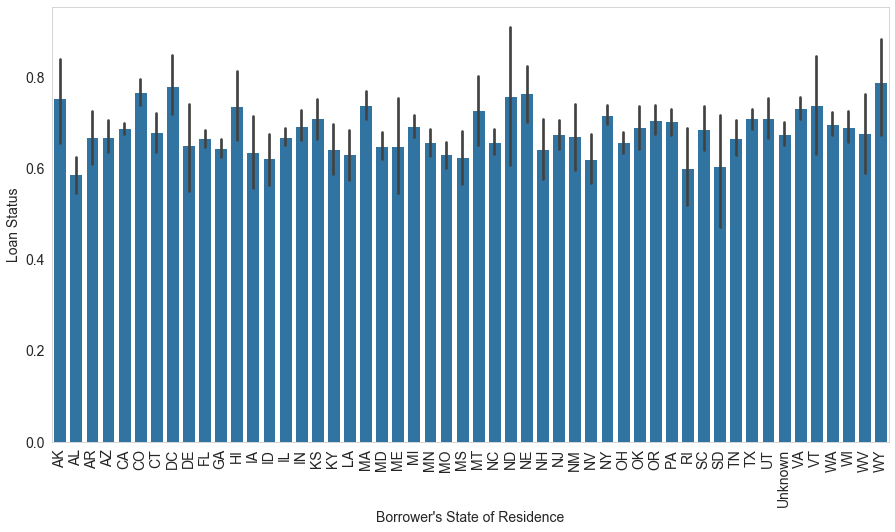

In [806]:
plt.figure(figsize = [15, 8]) 

ord = df_var_clean['BorrowerState'].value_counts().index.sort_values()
sb.barplot(x="BorrowerState", y="LoanStatus", data=df_var_clean, order = ord, color = base_color)
plt.xticks(fontsize = 14,rotation = 90)
plt.yticks(fontsize = 14)
plt.xlabel('Borrower\'s State of Residence', fontsize=14)
plt.ylabel('Loan Status', fontsize = 14);

In [807]:
dc ,al= df_var_clean.query("BorrowerState == 'DC'"),df_var_clean.query("BorrowerState == 'AL'")

1-dc["LoanStatus"].mean(),1-al["LoanStatus"].mean()

(0.2195121951219512, 0.4126506024096386)

There seems to be some variation. Loans to people in Alabama (AL) defaulted 42.06% of the time, whereas loans to people in Washington D.C only defaulted 22.62% of the time. Other frequent defaulters are people in Rhode Island (RI).

### 7) Loan Status vs Credit history

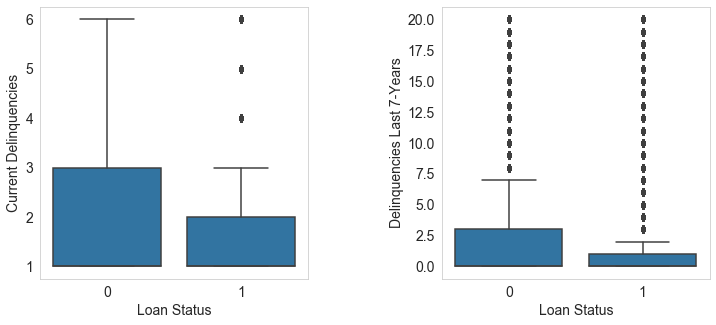

In [808]:
plt.figure(figsize = [12, 5]) 

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)

plt.subplot(1,2,1)
sb.boxplot(y="CurrentDelinquencies", x="LoanStatus", data=df_var_clean_del, color = base_color)
plt.xticks(rotation=0, fontsize=14);
plt.yticks(fontsize=14);
plt.ylabel('Current Delinquencies', fontsize=14);
plt.xlabel('Loan Status', fontsize=14);

plt.subplot(1,2,2)
sb.boxplot(y="DelinquenciesLast7Years", x="LoanStatus", data=df_var_clean, color = base_color)
plt.xticks(rotation=0, fontsize=14);
plt.yticks(fontsize=14);
plt.ylabel('Delinquencies Last 7-Years', fontsize=14);
plt.xlabel('Loan Status', fontsize=14);


Borrowers with higher number of delinquent accounts are more likely to default a loan. Similarly a history of delinquencies is an indicator of risky borrowers.

### LoanStatus vs Loan Characteristics

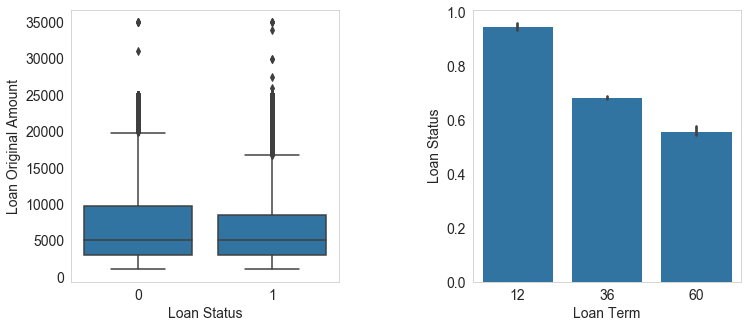

In [809]:
plt.figure(figsize = [12, 5]) 

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)

plt.subplot(1,2,1)
sb.boxplot(y="LoanOriginalAmount", x="LoanStatus", data=df_var_clean, color = base_color)
plt.xticks(rotation=0, fontsize=14);
plt.yticks(fontsize=14);
plt.ylabel('Loan Original Amount', fontsize=14);
plt.xlabel('Loan Status', fontsize=14);


plt.subplot(1,2,2)
sb.barplot(x="Term", y="LoanStatus", data=df_var_clean,color=base_color)
plt.xticks(rotation=0, fontsize=14);
plt.yticks(fontsize=14);
plt.ylabel('Loan Status', fontsize=14);
plt.xlabel('Loan Term', fontsize=14);





Intuitively and as shown on the charts, one woud expect that borrowers who collect higher loan principal will likely default in their loan. Such borrowers will have alonger loan repayment term. The barplot on the right term also shows that borrowers with longest loan term are more likely to default but this could be attributed to that fact that such borrowers have higher loan original amount.

The chart below tels us the proportion of default/complete for each loan term.

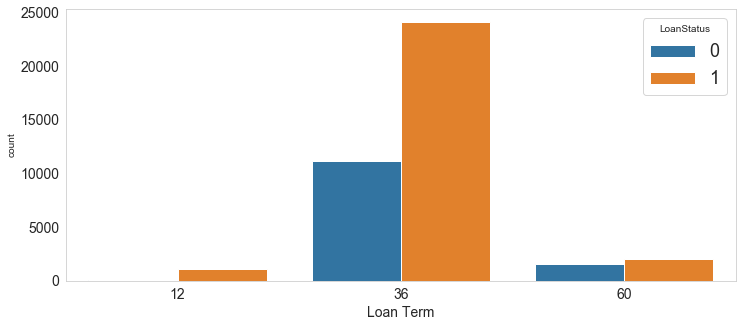

In [810]:
plt.figure(figsize = [12, 5]) 

sb.countplot(x="Term", hue="LoanStatus", data=df_var_clean)
plt.xticks(rotation=0, fontsize=14);
plt.yticks(fontsize=14);
#plt.ylabel('Amount Delinquent', fontsize=14);
plt.xlabel('Loan Term', fontsize=14);


In the chart above, we find that there are no borrowers on 12month term who default their loan. Similarly, for the 36 month and 60 month term, borrowers are seem to complete their loan more likely than default them. Thus to conclude, Loan term is not a factor why borrower's default their loan. - Here we have it, a loan term of 1 year has zero probability of default. 

- Tthe likelyhood of default increases with increase in loan term (Figure B). This makes sense in real life as many of lifeevent's may happen during the corse of loan repaymet and derail borrowers from completing their losn,

- Finally we see that we a higher number of borrowers had 3 years Loan term. 





### LoanStatus vs CreditScores

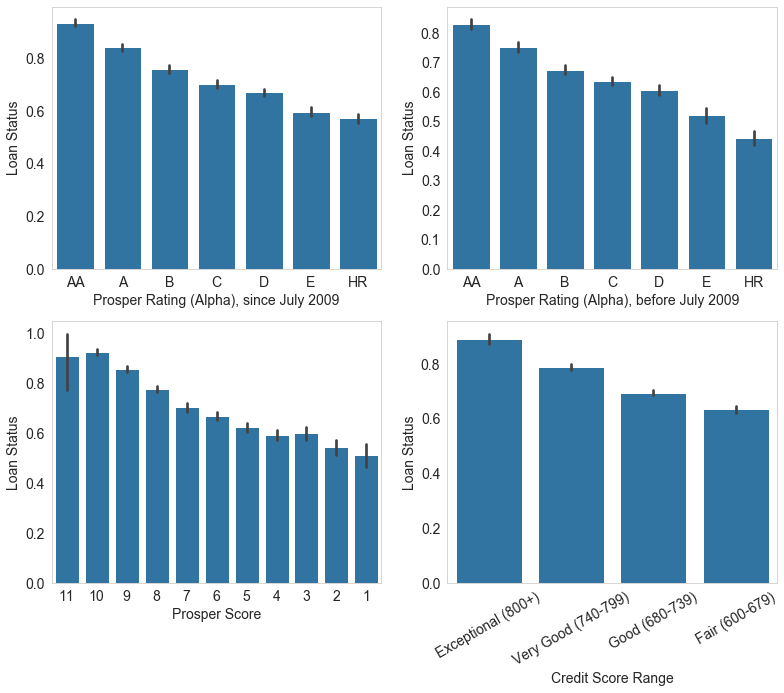

In [811]:
plt.figure(figsize = [13, 8]) 
plt.subplots_adjust(left=None, bottom=0, right=None, top=1, wspace=None, hspace=0.2)




plt.subplot(2,2,1)
ord = ['AA','A','B','C','D','E','HR']
sb.barplot(x="ProsperRatingAlpha", y="LoanStatus", data=df_since2009, order=ord, color = base_color)
plt.xticks(rotation=0, fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('Prosper Rating (Alpha), since July 2009', fontsize=14);
plt.ylabel('Loan Status', fontsize=14);


plt.subplot(2,2,2)
sb.barplot(x="CreditGrade", y="LoanStatus", data=df_before2009, order=ord, color = base_color)
plt.xticks(rotation=0, fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('Prosper Rating (Alpha), before July 2009', fontsize=14);
plt.ylabel('Loan Status', fontsize=14);

plt.subplot(2,2,3)

index = df_since2009['ProsperScore'].value_counts().index.sort_values(ascending=False)
sb.barplot(x="ProsperScore", y="LoanStatus", data=df_since2009, order = index, color = base_color)
plt.xticks(rotation=0, fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('Prosper Score', fontsize=14);
plt.ylabel('Loan Status', fontsize=14);

plt.subplot(2,2,4)
ind = ['Exceptional (800+)','Very Good (740-799)','Good (680-739)','Fair (600-679)']
sb.barplot(x="CreditScoreRange", y="LoanStatus", data=df_since2009, order=ind, color = base_color)
plt.xticks(rotation=30, fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('Credit Score Range', fontsize=14);
plt.ylabel('Loan Status', fontsize=14);



Both the Prosper scores and the credit score range seem to be doing a good job of predicting default, with higher ratings defaulting less frequently. Interestingly, the loans with the highest ProsperScores (11) default more frequently than loans rated at a 9 or a 10, and there is a high degree of variance in default rate for those highly rated loans.

## Summary of our bivariate analysis

### Loan Status vs independent variables

Loans are likely to default

- if Borrowers have lower income regardless of the loan original amount

- if the ratio of debt to income is high

- for borrowers with higher Available bankcard credit

- if the proportion of bankcard utilization if high 

- We also observed that with higher Loan Original Amount which results in higher monthly loan payment, there's a higher probability of default.

- Interestingly, borrowers with higher loan original amount will have to take a longer loan term such that there is a higher likelyhood of default with longer loan term.

- Borrowers who listed their employment status as 'Other' have the highest interest rate. These ones have been shown to more likely default their loan. Likewise, Part-time workers who are less likely to default their loan are seen to have the least BorrowerRate.

-  we see that those with shorter employment status duration are less likely to default a loan 

- We notice that listed their employment status as 'Other' seem to be dubious and are more likely to default their loan while part-time workers with the shortest employment duration status are less likely to default their loan.

- Borrowers with higher number of delinquent accounts are more likely to default a loan. Similarly longer history of delinquencies is an indicator of risky borrowers.

### Independent variable vs other independent variable

- Loan Original Amount and Monthly Loan Payment are positively correlated, indicating that borrowes who go for higher Loan Original Amount tend to make higher Monthly Loan Payment. 

- As expected, Borrowers with retired employment status have the longest enployment duration status, while we notice that part-time workers have the shortest employment duration-status. 


- On the other hand, the homeowners have a higher proportion of Debt-to-income ratio and bank card utilization respectively. 

- This is another point that justifies Monthly income is a stronger indicator whether a borrower would defaulta loan or not. 


## Multivariate Exploration

#### CreditScoreRange, BorrowerRate and LoanStatus

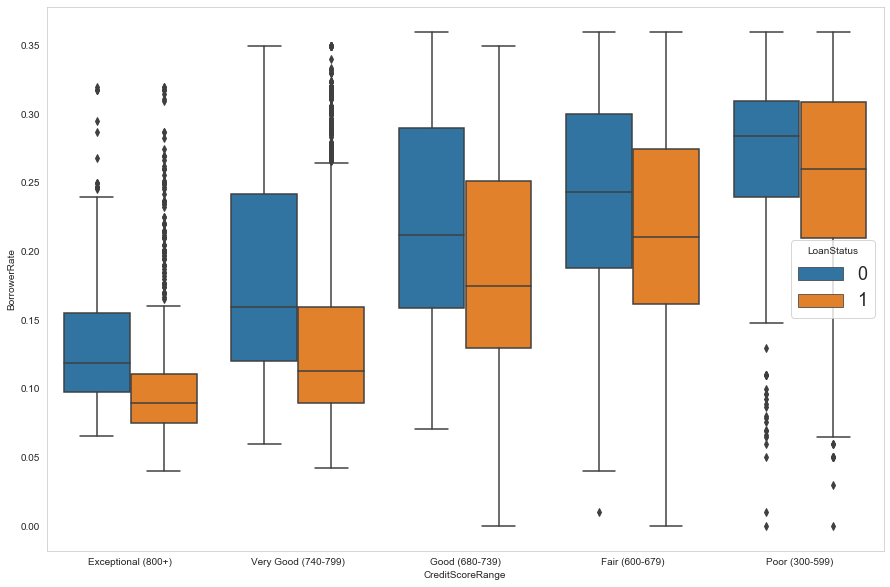

In [812]:
plt.figure(figsize = [15, 10]) 
sb.boxplot(x="CreditScoreRange", y='BorrowerRate', hue='LoanStatus', data=df_var_clean,order=index1);

Generally, loans with higher borrower's rate will default more than those with lower borrower's rate. This is even true when we set CreditScoreRange as a parameter.

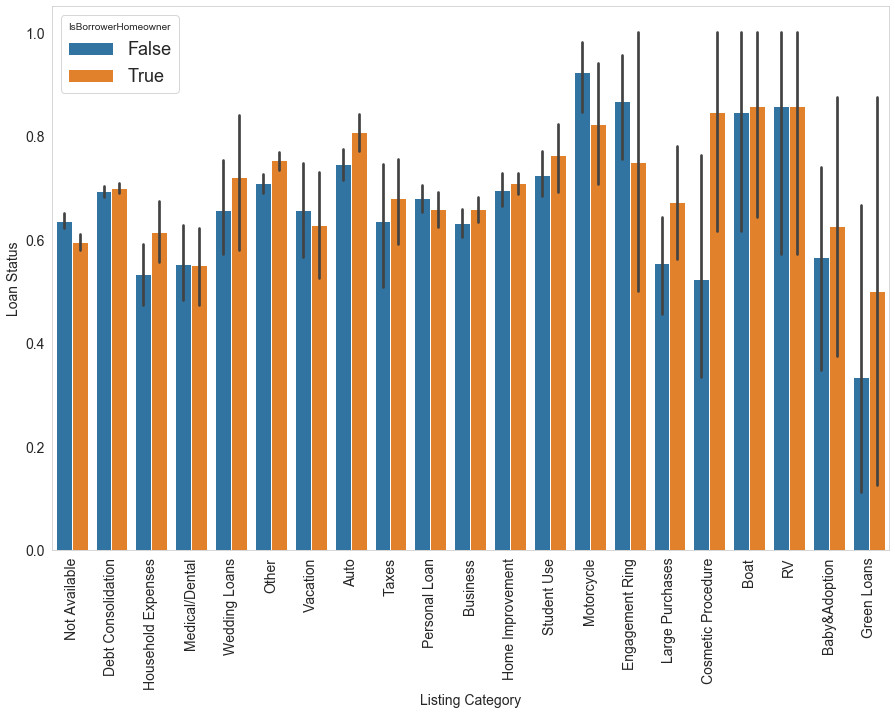

In [813]:
plt.figure(figsize = [15, 10]) 
sb.barplot(x="ListingCategory", y='LoanStatus', hue='IsBorrowerHomeowner', data=df_var_clean)
plt.xticks(rotation=90, fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('Listing Category', fontsize=14);
plt.ylabel('Loan Status', fontsize=14);

Here we show the relationship between ListingCategory, LoanStatus and IsborrowerHomeowner. Seems that certain loans are performing better than others when we control for IsborrowerHomeowner. If we recall in the bivariate section that loans for motorcycle are less likely to default than loans Green loans. In the bar plot above, we observe that for Motorcycle loans, borrowers who do not own a home are less likely to default their loan than those that own a home. While for Green loans, borrowers who own a home are less likely to default than those who own a home.

In [815]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Prosper Loan Data Analysis.ipynb'])

0